In [1]:
import pandas as pd

df = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_manipulated1.csv')

In [2]:
pd.set_option('display.max_columns', 120)

In [3]:
df.head()

Flight_Number_Marketing_Airline  CRSDepTime  DepTime DepTimeBlk  TaxiOut  \
0                             1582        1631   1627.0  1600-1659     15.0   
1                             1583        1024   1019.0  1000-1059     17.0   
2                             1584        1117   1113.0  1100-1159     14.0   
3                             1584        1237   1230.0  1200-1259     11.0   
4                             1585         900    857.0  0900-0959     13.0   

   TaxiIn  ArrTime  Cancelled  Diverted  CRSElapsedTime  ActualElapsedTime  \
0     5.0   1820.0        0.0       0.0           110.0              113.0   
1     3.0   1212.0        0.0       0.0           123.0              113.0   
2     4.0   1131.0        0.0       0.0            85.0               78.0   
3     5.0   1435.0        0.0       0.0            81.0               65.0   
4     8.0   1038.0        0.0       0.0           110.0              101.0   

   AirTime  Flights  DivAirportLandings Merged by Marketing_Airline_Network  \
0     93.0      1.0                   0       DL / DL / 19790 / DL / N545US   
1     93.0      1.0                   0       DL / DL / 19790 / DL / N345NB   
2     60.0      1.0                   0       DL / DL / 19790 / DL / N978AT   
3     49.0      1.0                   0       DL / DL / 19790 / DL / N978AT   
4     80.0      1.0                   0       DL / DL / 19790 / DL / N878DN   

  Merged by Operating_Airline  \
0             DL / 19790 / DL   
1             DL / 19790 / DL   
2             DL / 19790 / DL   
3             DL / 19790 / DL   
4             DL / 19790 / DL   

                           Merged by OriginAirportID  \
0  10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...   
1  11697 / 1169706 / 32467 / FLL / Fort Lauderdal...   
2  10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...   
3  12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...   
4  14524 / 1452401 / 34524 / RIC / Richmond, VA /...   

                          Merged by DestAirportSeqID       Merged by DepDelay  \
0  1169706 / 11697 / 32467 / FLL / Fort Lauderdal...  -4.0 / 0.0 / 0.0 / -1.0   
1  1449202 / 14492 / 34492 / RDU / Raleigh/Durham...  -5.0 / 0.0 / 0.0 / -1.0   
2  1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...  -4.0 / 0.0 / 0.0 / -1.0   
3  1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...  -7.0 / 0.0 / 0.0 / -1.0   
4  1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...  -3.0 / 0.0 / 0.0 / -1.0   

  Merged by CRSArrTime        Merged by ArrDelay Merged by Distance  
0     1821 / 1800-1859   -1.0 / 0.0 / 0.0 / -1.0          581.0 / 3  
1     1227 / 1200-1259  -15.0 / 0.0 / 0.0 / -1.0          680.0 / 3  
2     1142 / 1100-1159  -11.0 / 0.0 / 0.0 / -1.0          341.0 / 2  
3     1458 / 1400-1459  -23.0 / 0.0 / 0.0 / -2.0          341.0 / 2  
4     1050 / 1000-1059  -12.0 / 0.0 / 0.0 / -1.0          481.0 / 2

In [4]:
df.Flight_Number_Marketing_Airline.value_counts()

Flight_Number_Marketing_Airline
2438    183
1537    168
493     165
464     162
2368    155
       ... 
8772      1
6161      1
3334      1
8812      1
4463      1
Name: count, Length: 6235, dtype: int64

√ñni≈üleme a≈üamasƒ±nda √∂zniteliklerin aralarƒ±ndaki ili≈ükiyi analiz edilip veri seti √ºzerinde bir takƒ±m i≈ülemler ger√ßekle≈ütirilmi≈ütir.Veriseti, ≈üuanda daha √∂z, anlamlƒ± ve daha temiz bir durumdadƒ±r. Yine de kullanacaƒüƒ±mƒ±z makine √∂ƒürenmesi modeli i√ßin hazƒ±r hale geldiƒüini s√∂yleyemeyiz. Bu a≈üamada, belki de en ba≈üta yapmamƒ±z gereken, fakat √ßok fazla √∂znitelik arasƒ±nda boƒüulacaƒüƒ±mƒ±z i√ßin ertelediƒüimiz Ke≈üif√ßi Veri Analizi ger√ßekle≈ütirilecektir.

### √ñzniteliklerin Anlamlarƒ±

‚úÖ **Flight_Number_Marketing_Airline**: U√ßu≈ü numarasƒ±

‚ùå **CRSDepTime**: Kalkƒ±≈ü Saati (yerel saat: ssdd)

‚ùå **DepTime**: Ger√ßek Kalkƒ±≈ü Saati (yerel saat: ssdd)

‚úÖ **DepTimeBlk**: CRS Kalkƒ±≈ü Zaman Bloƒüu, Saatlik Aralƒ±klar.

‚ùå **TaxiOut**: U√ßaƒüƒ±n kalkƒ±≈üa hazƒ±rlanƒ±rken park yerinden kalkƒ±≈ü pistine y√∂nlendiƒüi s√ºreyi (dakika) ifade eder.

‚ùå**TaxiIn**: U√ßaƒüƒ±n inmi≈ü olduƒüu pistten park yerine doƒüru taksi yaptƒ±ƒüƒ± s√ºreyi (dakika) ifade eder.

‚ùå **ArrTime**: Ger√ßek Varƒ±≈ü Saati (yerel saat: hhmm)

‚ùå **Cancelled**: ƒ∞ptal Edilen U√ßu≈ü G√∂stergesi (1=Evet)

‚ùå **Diverted**: Bir u√ßaƒüƒ±n planlanan varƒ±≈ü noktasƒ±ndan ba≈üka bir havaalanƒ±na y√∂nlendirilmesini ifade eder. (1=Evet)

_ElapsedTime'ƒ±n anlamƒ±: Bu terim, bir u√ßaƒüƒ±n bir noktadan hareket ettiƒüi andan, hedef noktasƒ±na ula≈ütƒ±ƒüƒ± ana kadar ge√ßen toplam s√ºreyi ifade eder. Bu s√ºre, u√ßaƒüƒ±n kalkƒ±≈üa hazƒ±rlanma, taksi yapma, beklemeler, ini≈ü ve varƒ±≈ü sonrasƒ± s√ºre√ßleri i√ßerir. Yani, u√ßaƒüƒ±n kalkƒ±≈ü noktasƒ±ndan hedef noktasƒ±na kadar olan t√ºm s√ºreyi kapsar, bu s√ºre i√ßinde u√ßak havada olmak zorunda deƒüildir._

‚ùå **CRSElapsedTime**: Planlanan elapsed time (dakika)

‚ùå **ActualElapsedTime**: Ger√ßekle≈üen elapsed time (dakika)

‚úÖ **AirTime**: Bu terim, bir u√ßaƒüƒ±n ger√ßekten havada ge√ßirdiƒüi s√ºreyi ifade eder. (dakika cinsinden ifade edilmi≈ütir.)

‚ùå ~~**Flights**: (T√ºm deƒüerler aynƒ±, silinecek)~~

‚ùå ~~**DivAirportLandings**: (T√ºm deƒüerler aynƒ±, silinecek)~~

‚ùå **Merged by Marketing_Airline_Network** ve **Merged by Operating_Airline**: (Bu t√ºr bir kodlama, farklƒ± havayolu ta≈üƒ±yƒ±cƒ±larƒ±nƒ±n benzersiz tanƒ±mlayƒ±cƒ±larƒ±nƒ± sƒ±ralamak ve √∂nceki kullanƒ±cƒ±larƒ± belirtmek i√ßin kullanƒ±lƒ±yor gibi g√∂r√ºn√ºyor. Bu, zaman i√ßinde bu ta≈üƒ±yƒ±cƒ±larƒ±n kullanƒ±mƒ±nƒ± izlemek ve analiz etmek isteyenler i√ßin faydalƒ± olabilir. Bu proje i√ßin faydalƒ± olacaƒüa benzemiyor, silinecek) 

‚úÖ **Merged by OriginAirportID**: Kalkƒ±≈üƒ±n yapƒ±ldƒ±ƒüƒ± havalimanƒ± ve havalimanƒ±na ait geri kalan bilgilerin birle≈ütirildiƒüi kolon.

‚ùå **Merged by DestAirportSeqID:** ƒ∞ni≈üin yapƒ±ldƒ±ƒüƒ± havalimanƒ± ve havalimanƒ±na ait geri kalan bilgilerin birle≈ütirildiƒüi kolon. 

‚ùå **Merged by DepDelay**: Kalkƒ±≈ü s√ºresindeki gecikme ve deƒüi≈ümelerini g√∂steren √∂zniteliklerin birle≈ütiƒüi kolon.

‚ùå **Merged by CRSArrTime**: CRS Varƒ±≈ü Saati (yerel saat: hhmm)

‚ùå **Merged by ArrDelay**: ƒ∞ni≈ü s√ºresindeki gecikme ve deƒüi≈ümelerini g√∂steren √∂zniteliklerin birle≈ütiƒüi kolon.

‚ùå**Merged by Distance**: Havalimanlarƒ± arasƒ±ndaki mesafe (miles)

----



**DepDelay**/**ArrDelay**: Planlanan ve fiili kalkƒ±≈ü/ini≈ü saati arasƒ±ndaki dakika farkƒ±. Erken ayrƒ±lmalar negatif rakamlar g√∂steriyor.

**DepDelayMinutes**/**ArrDelayMinutes**: Planlanan ve fiili kalkƒ±≈ü/ini≈ü saati arasƒ±ndaki dakika farkƒ±. Erken kalkƒ±≈ülar/ini≈üler 0 olarak ayarlandƒ±.

**DepDel15**/**ArrDel15**: Kalkƒ±≈ü/ini≈ü gecikme G√∂stergesi, 15 dakika veya daha fazla (1=Evet)

**DepartureDelayGroups**/**ArrivalDelayGroups**: Kalkƒ±≈ü/ini≈ü Gecikmesi aralƒ±klarƒ±, her (<-15'ten >180'e 15 dakika)

In [5]:
target_cols_departure = ['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups']
target_cols_arrival = ['ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups']


def merge_edilmis_kolonlari_ayir(target_col):
    df[target_col] = df['Merged by DepDelay'].str.split(' / ', expand=True)
    df[target_col] = df[target_col].astype(float)

merge_edilmis_kolonlari_ayir(target_col=target_cols_departure)
merge_edilmis_kolonlari_ayir(target_col=target_cols_arrival)

In [6]:
df.head(1)

Flight_Number_Marketing_Airline  CRSDepTime  DepTime DepTimeBlk  TaxiOut  \
0                             1582        1631   1627.0  1600-1659     15.0   

   TaxiIn  ArrTime  Cancelled  Diverted  CRSElapsedTime  ActualElapsedTime  \
0     5.0   1820.0        0.0       0.0           110.0              113.0   

   AirTime  Flights  DivAirportLandings Merged by Marketing_Airline_Network  \
0     93.0      1.0                   0       DL / DL / 19790 / DL / N545US   

  Merged by Operating_Airline  \
0             DL / 19790 / DL   

                           Merged by OriginAirportID  \
0  10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...   

                          Merged by DestAirportSeqID       Merged by DepDelay  \
0  1169706 / 11697 / 32467 / FLL / Fort Lauderdal...  -4.0 / 0.0 / 0.0 / -1.0   

  Merged by CRSArrTime       Merged by ArrDelay Merged by Distance  DepDelay  \
0     1821 / 1800-1859  -1.0 / 0.0 / 0.0 / -1.0          581.0 / 3      -4.0   

   DepDelayMinutes  DepDel15  DepartureDelayGroups  ArrDelay  ArrDelayMinutes  \
0              0.0       0.0                  -1.0      -4.0              0.0   

   ArrDel15  ArrivalDelayGroups  
0       0.0                -1.0

In [7]:
df.drop(['Merged by DepDelay', 'Merged by ArrDelay'], axis=1, inplace=True)

In [8]:
df.head(1)

Flight_Number_Marketing_Airline  CRSDepTime  DepTime DepTimeBlk  TaxiOut  \
0                             1582        1631   1627.0  1600-1659     15.0   

   TaxiIn  ArrTime  Cancelled  Diverted  CRSElapsedTime  ActualElapsedTime  \
0     5.0   1820.0        0.0       0.0           110.0              113.0   

   AirTime  Flights  DivAirportLandings Merged by Marketing_Airline_Network  \
0     93.0      1.0                   0       DL / DL / 19790 / DL / N545US   

  Merged by Operating_Airline  \
0             DL / 19790 / DL   

                           Merged by OriginAirportID  \
0  10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...   

                          Merged by DestAirportSeqID Merged by CRSArrTime  \
0  1169706 / 11697 / 32467 / FLL / Fort Lauderdal...     1821 / 1800-1859   

  Merged by Distance  DepDelay  DepDelayMinutes  DepDel15  \
0          581.0 / 3      -4.0              0.0       0.0   

   DepartureDelayGroups  ArrDelay  ArrDelayMinutes  ArrDel15  \
0                  -1.0      -4.0              0.0       0.0   

   ArrivalDelayGroups  
0                -1.0

In [9]:
df.loc[:3, ['CRSDepTime', 'DepTime', 'DepDelay']]

CRSDepTime  DepTime  DepDelay
0        1631   1627.0      -4.0
1        1024   1019.0      -5.0
2        1117   1113.0      -4.0
3        1237   1230.0      -7.0

G√∂zlemlenebileceƒüi √ºzere DepTime (Ger√ßek kalkƒ±≈ü zamanƒ±) - CRSDepTime (Planlanan kalkƒ±≈ü zamanƒ±) = DepDelay (Kalkƒ±≈ütaki gecikme)

U√ßaƒüƒ±n saat ka√ßta kalktƒ±ƒüƒ± ile erteleme olup olmadƒ±ƒüƒ± arasƒ±nda bir baƒüƒ±ntƒ± olabilir. O sebeple planlanan kalkƒ±≈ü zamanƒ± (CRSDepTime) doƒüru formata √ßevrilip tutulabilir.

In [10]:
df.CRSDepTime.describe()

count    291532.000000
mean       1210.649150
std         328.764115
min         600.000000
25%         935.000000
50%        1215.000000
75%        1500.000000
max        1859.000000
Name: CRSDepTime, dtype: float64

CRS formatƒ±nda 1200 g√∂sterimi 12:00'a denk gelmektedir. Kalkƒ±≈ü s√ºrelerindeki gecikmeyi temsil eden s√ºrekli deƒüi≈üken s√ºtunu (DepDelay) ile bu CRSDepTime s√ºtunu arasƒ±nda bir korelasyon s√∂z konusu mu bakalƒ±m.

In [11]:
df.loc[:, ['DepDelay', 'CRSDepTime']].corr()

DepDelay  CRSDepTime
DepDelay     1.00000     0.04061
CRSDepTime   0.04061     1.00000

**Bu ≈üekilde yapƒ±lan deƒüerlendirme yanlƒ±≈ütƒ±r.** ƒ∞ki deƒüi≈üken de n√ºmerik olarak ifade edildiƒüinde ger√ßek anlamƒ±nƒ± tam manasƒ±yla koruyamamaktadƒ±r. √ñƒürenilmek istenen ≈üey belli zaman dilimlerinde daha sƒ±k g√∂r√ºlen bir erken kalkƒ±≈ü yahut bir ge√ß kalkƒ±≈ü s√∂z konusu mudur? Bunun i√ßin iki s√ºrekli deƒüi≈ükeni de kategorik olarak gruplandƒ±ralƒ±m.

In [12]:
df_delay_deptime = df.loc[:, ['DepDelay', 'CRSDepTime']]

new_col_names = {
    'CRSDepTime': 'DepTime'
}


df_delay_deptime.rename(columns=new_col_names, inplace=True)

def funcDepDelayLabel(x):
    minik_aksaklik = 5
    if ((x < minik_aksaklik) & (x > -minik_aksaklik)): x = 'On Time' #
    # Yukarƒ±daki ko≈üulda minik aksaklƒ±klar g√∂z ardƒ± edilmi≈ütir. "minik_aksaklik" ifadesi farklƒ± dakikalarla da tanƒ±mlanabilir. Bu tamamen keyfi bir deƒüi≈ükendir ve g√∂zlemlenerek belirlenmelidir. 
    elif x < 0: x = 'Early'
    else: x = 'Delay'
    return x

df_delay_deptime['DelayLabel'] = df_delay_deptime['DepDelay'].apply(funcDepDelayLabel)

df_delay_deptime['DepTimeLabel'] = df_delay_deptime['DepTime'].apply(lambda x: 'Morning' if x < 1200 else 'Noon')

In [13]:
df_delay_deptime

DepDelay  DepTime DelayLabel DepTimeLabel
0           -4.0     1631    On Time         Noon
1           -5.0     1024      Early      Morning
2           -4.0     1117    On Time      Morning
3           -7.0     1237      Early         Noon
4           -3.0      900    On Time      Morning
...          ...      ...        ...          ...
291527    1191.0     1621      Delay         Noon
291528       4.0     1621    On Time         Noon
291529      81.0     1621      Delay         Noon
291530      -2.0     1740    On Time         Noon
291531      65.0     1740      Delay         Noon

[291532 rows x 4 columns]

In [14]:
pdSeries_value_counts = df_delay_deptime.loc[:, ['DelayLabel', 'DepTimeLabel']].value_counts().to_frame()

In [15]:
pdSeries_value_counts

count
DelayLabel DepTimeLabel       
On Time    Morning       54351
           Noon          53498
Early      Noon          53456
           Morning       52502
Delay      Noon          45538
           Morning       32187

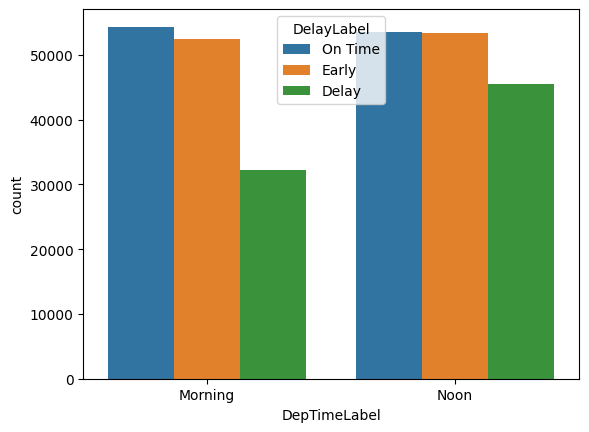

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x = 'DepTimeLabel', y = 'count', hue = 'DelayLabel', data = pdSeries_value_counts);

Minik aksaklƒ±klar g√∂z ardƒ± edildiƒüinde, g√ºn√ºn ikinci yarƒ±sƒ±nda zamanƒ±nda kalkan u√ßu≈ülar, gecikmeli kalkan u√ßu≈ülar ve erken kalkan u√ßu≈ülar neredeyse e≈üit daƒüƒ±lƒ±ma sahiptir. Fakat g√ºn√ºn ilk yarƒ±sƒ±nda nispeten daha az bir gecikmeli kalkƒ±≈ü olduƒüu belirtilmelidir. Bu konuyu daha detaylƒ± g√ºn b√∂l√ºtlemeleri ile irdelemeye devam edelim.

In [17]:
def func_condition(x):
    if x < 900: x = 'Morning'
    elif x < 1200: x= 'Forenoon'
    elif x < 1500: x='Noon'
    else: x = 'Afternoon'
    return x

df_delay_deptime['DepTimeLabel'] = df_delay_deptime['DepTime'].apply(func_condition)

In [18]:
pdSeries_value_counts = df_delay_deptime.loc[:, ['DelayLabel', 'DepTimeLabel']].value_counts().to_frame()

In [19]:
pdSeries_value_counts

count
DelayLabel DepTimeLabel       
On Time    Forenoon      30808
Early      Forenoon      29666
On Time    Noon          28171
Early      Noon          27888
           Afternoon     25568
On Time    Afternoon     25327
           Morning       23543
Delay      Afternoon     23006
Early      Morning       22836
Delay      Noon          22532
           Forenoon      20844
           Morning       11343

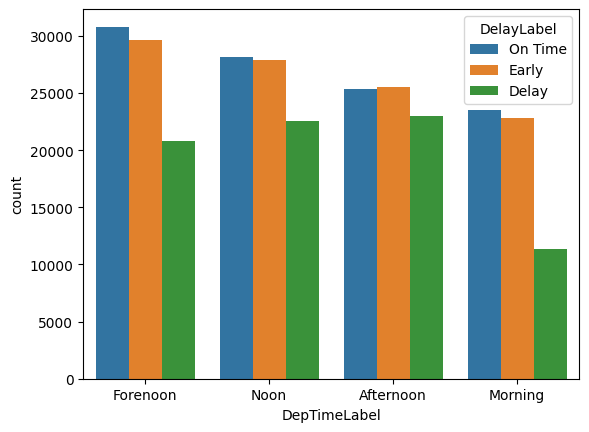

In [20]:
sns.barplot(x = 'DepTimeLabel', y = 'count', 
            hue = 'DelayLabel', 
            data = pdSeries_value_counts);

Bir de y√ºzdeliklerine g√∂re grafiklendirelim.

In [21]:
pdSeries_value_counts.sort_values('DepTimeLabel')

count
DelayLabel DepTimeLabel       
Early      Afternoon     25568
On Time    Afternoon     25327
Delay      Afternoon     23006
On Time    Forenoon      30808
Early      Forenoon      29666
Delay      Forenoon      20844
On Time    Morning       23543
Early      Morning       22836
Delay      Morning       11343
On Time    Noon          28171
Early      Noon          27888
Delay      Noon          22532

In [22]:
pdSeries_value_counts_sums = pdSeries_value_counts.groupby('DepTimeLabel').sum()
pdSeries_value_counts_sums

count
DepTimeLabel       
Afternoon     73901
Forenoon      81318
Morning       57722
Noon          78591

In [23]:
pdSeries_vc_merged = pd.merge(
    left = pdSeries_value_counts.sort_values('DepTimeLabel'),
    right = pdSeries_value_counts_sums,
    on= 'DepTimeLabel',
    how = 'inner')

In [24]:
pdSeries_vc_merged.rename(columns={
    'count_x': 'DepTimeLabelCounts',
    'count_y': 'DepTimeLabelSums'
}, inplace=True)

In [25]:
pdSeries_vc_merged

DepTimeLabelCounts  DepTimeLabelSums
DepTimeLabel                                      
Afternoon                  25568             73901
Afternoon                  25327             73901
Afternoon                  23006             73901
Forenoon                   30808             81318
Forenoon                   29666             81318
Forenoon                   20844             81318
Morning                    23543             57722
Morning                    22836             57722
Morning                    11343             57722
Noon                       28171             78591
Noon                       27888             78591
Noon                       22532             78591

In [26]:
pdSeries_vc_merged['DepTimeLabelPercentages'] = pdSeries_vc_merged['DepTimeLabelCounts'] / pdSeries_vc_merged['DepTimeLabelSums'] * 100

pdSeries_vc_merged['DepTimeLabelPercentages'] = pdSeries_vc_merged['DepTimeLabelPercentages'].astype(int)

In [27]:
pdSeries_vc_merged = pdSeries_vc_merged.reset_index()

In [28]:
pdSeries_vc_merged

DepTimeLabel  DepTimeLabelCounts  DepTimeLabelSums  DepTimeLabelPercentages
0     Afternoon               25568             73901                       34
1     Afternoon               25327             73901                       34
2     Afternoon               23006             73901                       31
3      Forenoon               30808             81318                       37
4      Forenoon               29666             81318                       36
5      Forenoon               20844             81318                       25
6       Morning               23543             57722                       40
7       Morning               22836             57722                       39
8       Morning               11343             57722                       19
9          Noon               28171             78591                       35
10         Noon               27888             78591                       35
11         Noon               22532             78591                       28

In [29]:
pdSeries_value_counts = pdSeries_value_counts.sort_values('DepTimeLabel').reset_index()
pdSeries_value_counts

DelayLabel DepTimeLabel  count
0       Early    Afternoon  25568
1     On Time    Afternoon  25327
2       Delay    Afternoon  23006
3     On Time     Forenoon  30808
4       Early     Forenoon  29666
5       Delay     Forenoon  20844
6     On Time      Morning  23543
7       Early      Morning  22836
8       Delay      Morning  11343
9     On Time         Noon  28171
10      Early         Noon  27888
11      Delay         Noon  22532

True ve False deƒüerleri de aynƒ± dataframe √ºzerinde g√∂rebilmek adƒ±na bir merge i≈ülemi daha ger√ßekle≈ütirelim.

In [30]:
df_vc_merged = pdSeries_vc_merged.merge(
    pdSeries_value_counts,
    left_on = ['DepTimeLabel', 'DepTimeLabelCounts'],
    right_on= ['DepTimeLabel', 'count'],
    how = 'inner'
)
df_vc_merged 

DepTimeLabel  DepTimeLabelCounts  DepTimeLabelSums  \
0     Afternoon               25568             73901   
1     Afternoon               25327             73901   
2     Afternoon               23006             73901   
3      Forenoon               30808             81318   
4      Forenoon               29666             81318   
5      Forenoon               20844             81318   
6       Morning               23543             57722   
7       Morning               22836             57722   
8       Morning               11343             57722   
9          Noon               28171             78591   
10         Noon               27888             78591   
11         Noon               22532             78591   

    DepTimeLabelPercentages DelayLabel  count  
0                        34      Early  25568  
1                        34    On Time  25327  
2                        31      Delay  23006  
3                        37    On Time  30808  
4                        36      Early  29666  
5                        25      Delay  20844  
6                        40    On Time  23543  
7                        39      Early  22836  
8                        19      Delay  11343  
9                        35    On Time  28171  
10                       35      Early  27888  
11                       28      Delay  22532

Merge i≈üleminin sonucunda count kolonunun ortak kolon olmasƒ±ndan ve how parametresinin left almasƒ±ndan kaynaklƒ± kaybolmasƒ± gerekirdi. Kaybolmuyor. üòë Bende iloc ile yok ederim paraziti.

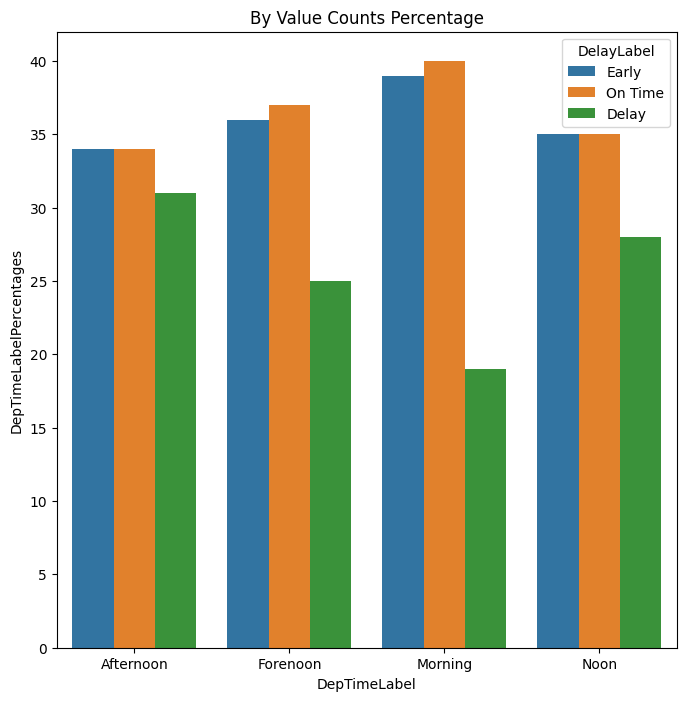

In [31]:
plt.figure(figsize=(8,8))

sns.barplot(x = 'DepTimeLabel', y = 'DepTimeLabelPercentages', hue = 'DelayLabel', data = df_vc_merged);

plt.title('By Value Counts Percentage');

Buradan yapabileceƒüimiz bilgi √ßƒ±karƒ±mlarƒ± ≈üunlardƒ±r:

U√ßu≈ü vaktinin, u√ßu≈ülarƒ±n ertelenmesi ile ilgili yegane temsilci olmadƒ±ƒüƒ± sezgisel olarak da zaten ortadadƒ±r. Fakat, vakit aralƒ±klarƒ±nda u√ßu≈ülarƒ±n kalkƒ±≈üƒ±nda ne gibi uyumsuzluklar olduƒüunun √ßƒ±karƒ±mƒ± kƒ±ymetlidir. 

Yukarƒ±daki grafikte edinebileceƒüimiz en √∂nemli √ßƒ±karƒ±m, g√ºn√ºn bu d√∂rt b√∂l√ºt√ºn√ºn (Morning, Forenoon, Noon, Afternoon) u√ßu≈ülarƒ±n kalkƒ±≈ü zamanlasƒ±ndaki deƒüi≈ükenlikleri a√ßƒ±klamak i√ßin **kullanƒ±labileceƒüidir.** 

Apa√ßƒ±k g√∂r√ºnmektedir ki, u√ßu≈ülardaki erteleme (Delay) sabah saatlerinde daha d√º≈ü√ºk seviyelerde seyrederken, g√ºn ilerledik√ße; yani Morning -> Forenoon -> Noon -> Afternoon sƒ±rasƒ± ile gittik√ße artmaktadƒ±r. G√ºn ilerledik√ße erken kalkƒ±≈ülarƒ±n sayƒ±sƒ± da ufak bir artƒ±≈üa meyletse de √ßok b√ºy√ºk bir fark olu≈ümamƒ±≈ütƒ±r.

Son olarak kalkƒ±≈ü zamanƒ±nƒ± veri setinde hazƒ±r olarak verilen b√∂l√ºtlemeye g√∂re g√∂rselle≈ütirelim.

In [32]:
df.DepTimeBlk.value_counts()

DepTimeBlk
1000-1059    29831
0800-0859    27551
1100-1159    27335
1200-1259    26952
1300-1359    26138
1400-1459    25501
1500-1559    24738
0900-0959    24152
1600-1659    22516
0700-0759    20001
1700-1759    18124
0600-0659    10170
1800-1859     8523
Name: count, dtype: int64

In [33]:
df_delay_deptime = df.loc[:, ['DepDelay', 'DepTimeBlk']]
df_delay_deptime

DepDelay DepTimeBlk
0           -4.0  1600-1659
1           -5.0  1000-1059
2           -4.0  1100-1159
3           -7.0  1200-1259
4           -3.0  0900-0959
...          ...        ...
291527    1191.0  1600-1659
291528       4.0  1600-1659
291529      81.0  1600-1659
291530      -2.0  1700-1759
291531      65.0  1700-1759

[291532 rows x 2 columns]

In [34]:
df_delay_deptime['DelayLabel'] = df_delay_deptime['DepDelay'].apply(funcDepDelayLabel)
df_delay_deptime

DepDelay DepTimeBlk DelayLabel
0           -4.0  1600-1659    On Time
1           -5.0  1000-1059      Early
2           -4.0  1100-1159    On Time
3           -7.0  1200-1259      Early
4           -3.0  0900-0959    On Time
...          ...        ...        ...
291527    1191.0  1600-1659      Delay
291528       4.0  1600-1659    On Time
291529      81.0  1600-1659      Delay
291530      -2.0  1700-1759    On Time
291531      65.0  1700-1759      Delay

[291532 rows x 3 columns]

In [35]:
df_deptimeblk_label_vc = df_delay_deptime.iloc[:, 1:].value_counts().to_frame().reset_index()
df_deptimeblk_label_vc

DepTimeBlk DelayLabel  count
0   1000-1059    On Time  11353
1   0800-0859    On Time  11008
2   1000-1059      Early  10913
3   0800-0859      Early  10630
4   1100-1159    On Time  10000
5   1200-1259    On Time   9999
6   1100-1159      Early   9788
7   1200-1259      Early   9739
8   0900-0959    On Time   9455
9   1300-1359      Early   9286
10  1400-1459    On Time   9103
11  1500-1559    On Time   9086
12  1300-1359    On Time   9069
13  0900-0959      Early   8965
14  1400-1459      Early   8863
15  0700-0759    On Time   8326
16  1500-1559      Delay   7906
17  0700-0759      Early   7878
18  1300-1359      Delay   7783
19  1600-1659    On Time   7749
20  1500-1559      Early   7746
21  1600-1659      Early   7710
22  1000-1059      Delay   7565
23  1100-1159      Delay   7547
24  1400-1459      Delay   7535
25  1200-1259      Delay   7214
26  1600-1659      Delay   7057
27  1700-1759      Early   6715
28  0800-0859      Delay   5913
29  1700-1759    On Time   5870
30  0900-0959      Delay   5732
31  1700-1759      Delay   5539
32  0600-0659      Early   4328
33  0600-0659    On Time   4209
34  0700-0759      Delay   3797
35  1800-1859      Early   3397
36  1800-1859    On Time   2622
37  1800-1859      Delay   2504
38  0600-0659      Delay   1633

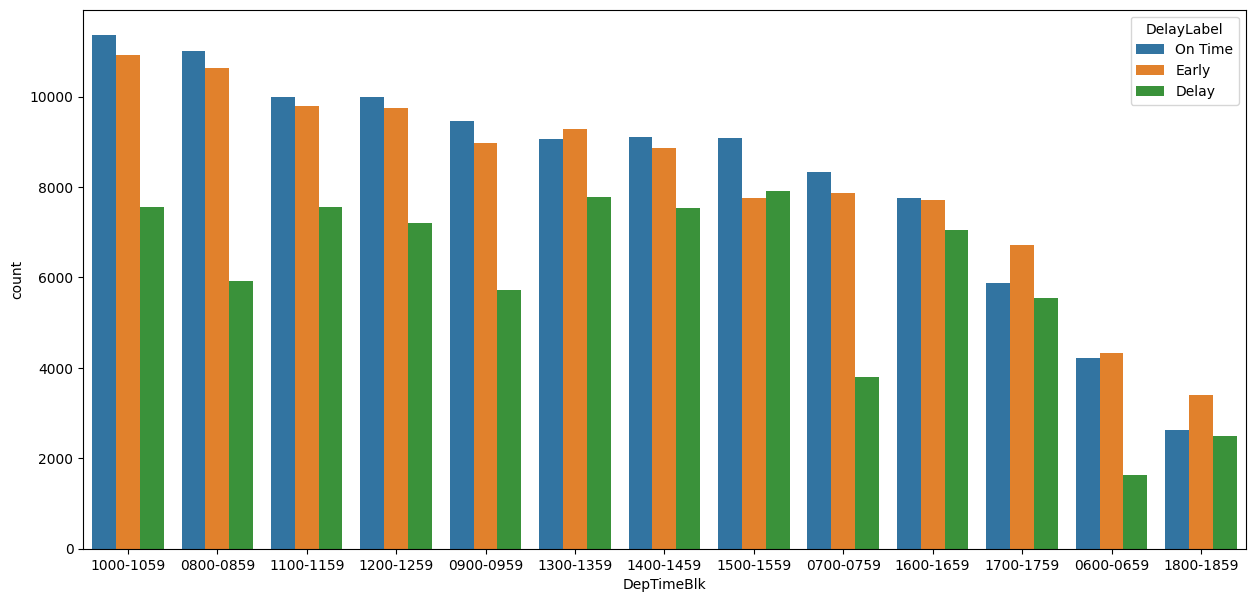

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'DepTimeBlk', y = 'count', hue = 'DelayLabel', data = df_deptimeblk_label_vc);

≈ûimdi de y√ºzdeliklerine g√∂re daƒüƒ±talƒ±m

In [37]:
df_deptimeblk_sums = df_deptimeblk_label_vc.iloc[:, [0,2]].groupby('DepTimeBlk').sum().reset_index()

In [38]:
df_deptimeblk_sums

DepTimeBlk  count
0   0600-0659  10170
1   0700-0759  20001
2   0800-0859  27551
3   0900-0959  24152
4   1000-1059  29831
5   1100-1159  27335
6   1200-1259  26952
7   1300-1359  26138
8   1400-1459  25501
9   1500-1559  24738
10  1600-1659  22516
11  1700-1759  18124
12  1800-1859   8523

In [39]:
df_merged = df_deptimeblk_label_vc.merge(
    df_deptimeblk_sums,
    on = ['DepTimeBlk']
)
df_merged

DepTimeBlk DelayLabel  count_x  count_y
0   1000-1059    On Time    11353    29831
1   1000-1059      Early    10913    29831
2   1000-1059      Delay     7565    29831
3   0800-0859    On Time    11008    27551
4   0800-0859      Early    10630    27551
5   0800-0859      Delay     5913    27551
6   1100-1159    On Time    10000    27335
7   1100-1159      Early     9788    27335
8   1100-1159      Delay     7547    27335
9   1200-1259    On Time     9999    26952
10  1200-1259      Early     9739    26952
11  1200-1259      Delay     7214    26952
12  0900-0959    On Time     9455    24152
13  0900-0959      Early     8965    24152
14  0900-0959      Delay     5732    24152
15  1300-1359      Early     9286    26138
16  1300-1359    On Time     9069    26138
17  1300-1359      Delay     7783    26138
18  1400-1459    On Time     9103    25501
19  1400-1459      Early     8863    25501
20  1400-1459      Delay     7535    25501
21  1500-1559    On Time     9086    24738
22  1500-1559      Delay     7906    24738
23  1500-1559      Early     7746    24738
24  0700-0759    On Time     8326    20001
25  0700-0759      Early     7878    20001
26  0700-0759      Delay     3797    20001
27  1600-1659    On Time     7749    22516
28  1600-1659      Early     7710    22516
29  1600-1659      Delay     7057    22516
30  1700-1759      Early     6715    18124
31  1700-1759    On Time     5870    18124
32  1700-1759      Delay     5539    18124
33  0600-0659      Early     4328    10170
34  0600-0659    On Time     4209    10170
35  0600-0659      Delay     1633    10170
36  1800-1859      Early     3397     8523
37  1800-1859    On Time     2622     8523
38  1800-1859      Delay     2504     8523

In [40]:
df_merged['Percentages'] = (df_merged['count_x'] / df_merged['count_y'] * 100).astype(int)
df_merged.sort_values(by='DepTimeBlk', inplace=True)
df_merged

DepTimeBlk DelayLabel  count_x  count_y  Percentages
33  0600-0659      Early     4328    10170           42
34  0600-0659    On Time     4209    10170           41
35  0600-0659      Delay     1633    10170           16
24  0700-0759    On Time     8326    20001           41
26  0700-0759      Delay     3797    20001           18
25  0700-0759      Early     7878    20001           39
3   0800-0859    On Time    11008    27551           39
4   0800-0859      Early    10630    27551           38
5   0800-0859      Delay     5913    27551           21
14  0900-0959      Delay     5732    24152           23
13  0900-0959      Early     8965    24152           37
12  0900-0959    On Time     9455    24152           39
0   1000-1059    On Time    11353    29831           38
2   1000-1059      Delay     7565    29831           25
1   1000-1059      Early    10913    29831           36
8   1100-1159      Delay     7547    27335           27
7   1100-1159      Early     9788    27335           35
6   1100-1159    On Time    10000    27335           36
9   1200-1259    On Time     9999    26952           37
10  1200-1259      Early     9739    26952           36
11  1200-1259      Delay     7214    26952           26
15  1300-1359      Early     9286    26138           35
16  1300-1359    On Time     9069    26138           34
17  1300-1359      Delay     7783    26138           29
19  1400-1459      Early     8863    25501           34
20  1400-1459      Delay     7535    25501           29
18  1400-1459    On Time     9103    25501           35
22  1500-1559      Delay     7906    24738           31
21  1500-1559    On Time     9086    24738           36
23  1500-1559      Early     7746    24738           31
27  1600-1659    On Time     7749    22516           34
28  1600-1659      Early     7710    22516           34
29  1600-1659      Delay     7057    22516           31
30  1700-1759      Early     6715    18124           37
31  1700-1759    On Time     5870    18124           32
32  1700-1759      Delay     5539    18124           30
37  1800-1859    On Time     2622     8523           30
36  1800-1859      Early     3397     8523           39
38  1800-1859      Delay     2504     8523           29

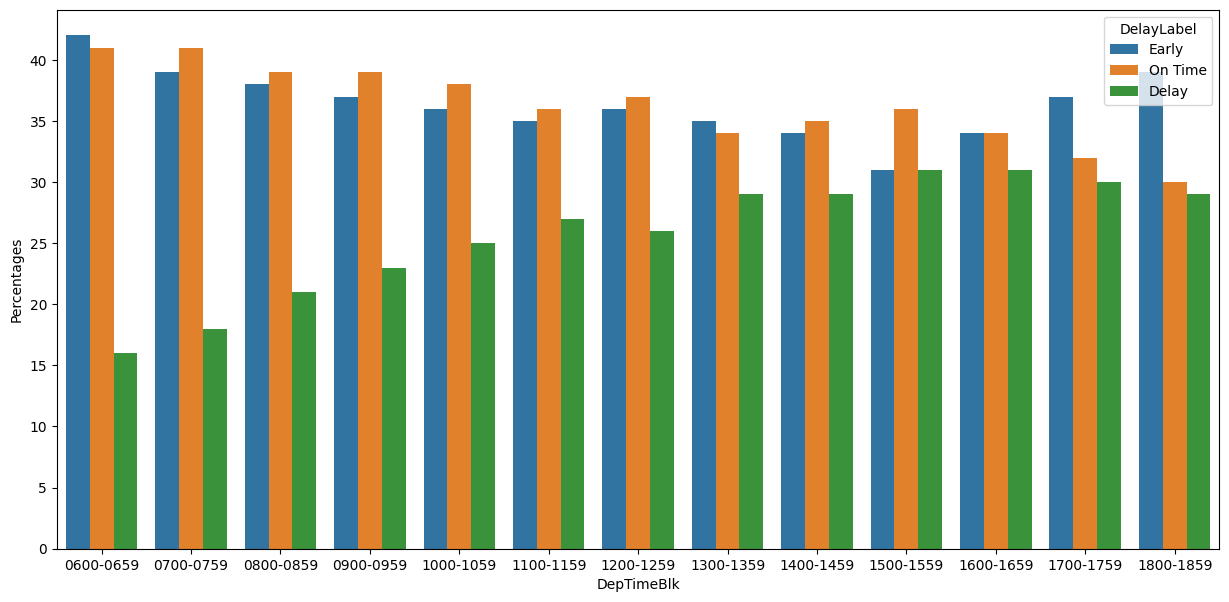

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'DepTimeBlk', y = 'Percentages', hue = 'DelayLabel', data = df_merged);

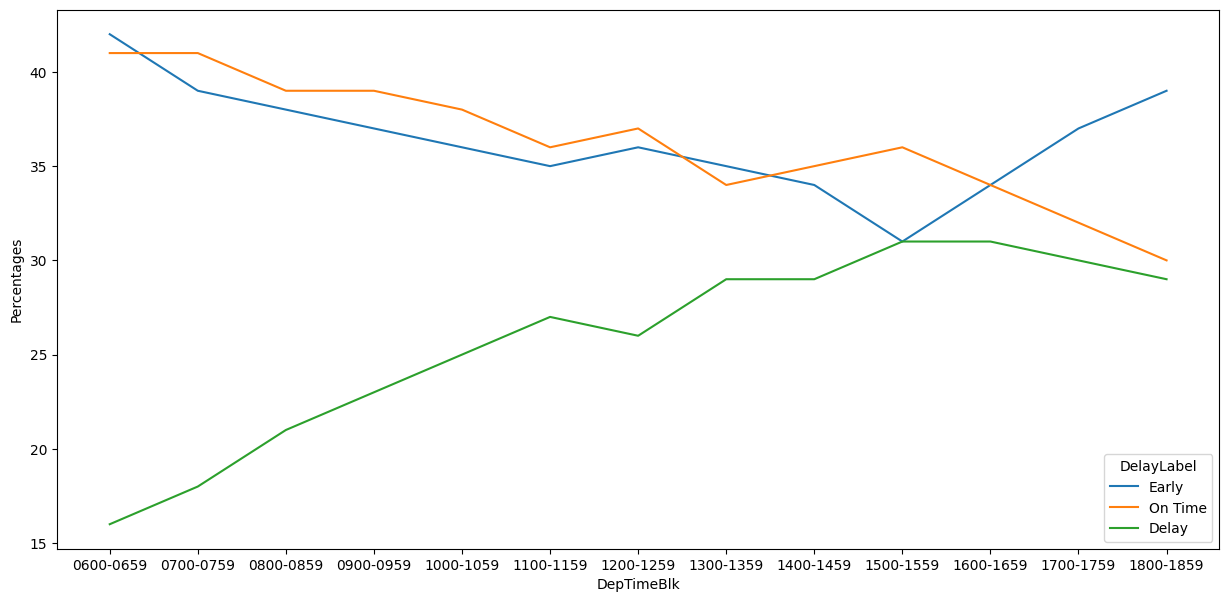

In [42]:
plt.figure(figsize=(15,7))
sns.lineplot(x = 'DepTimeBlk', y = 'Percentages', hue = 'DelayLabel', data = df_merged);

Bu grafik, √∂nceki yaptƒ±klarƒ±mƒ±za g√∂re √ßok daha geni≈ü bir g√ºn b√∂l√ºtlemesi i√ßermektedir. Lineplot ile √ßizdirildiƒüinde daha iyi g√∂zlemlenebilir. 

**√ñzellikle dikkat √ßeken hususlar ≈üunlardƒ±r:**

_Delay (U√ßu≈ü ertelemesi)_: 
- G√ºn√ºn erken saatlerinden, saat 16'ya dek d√ºzenli bir artƒ±≈ü g√∂zlemlendiƒüini s√∂ylemek yanlƒ±≈ü olmaz. Ak≈üam saatlerinde bu rakam √ßok ufak bir azalma seyretse de, stabilitesini koruduƒüunu s√∂yleyebiliriz.

_Early (Erken kalkƒ±≈ülar)_: 
- G√ºn√ºn erken saatlerinde √ßok daha y√ºksek miktarda ya≈üandƒ±ƒüƒ± g√∂zlemlenmektedir. Ertelenen u√ßu≈ülar ile arasƒ±nda ≈ü√∂yle bir baƒülantƒ± kurulabilir: Saat 16'ya dek erken u√ßu≈ü ya≈üanma ihtimali azalƒ±rken, erteleme ya≈üanma ihtimali gittik√ße artmaktadƒ±r. Saat 15-16 sularƒ±nda iki olayƒ±n ger√ßekle≈ümesi ihtimali neredeyse aynƒ±, ve zamanƒ±nda kalkƒ±≈ü olma olasƒ±lƒ±ƒüƒ±ndan d√º≈ü√ºk olarak g√∂zlemlenirken. Bu zaman aralƒ±ƒüƒ±nƒ±n akabindeki saatlerde tekrardan erken kalkƒ±≈ü durumlarƒ±, gecikmeli kalkƒ±≈ü durumlarƒ±nƒ±n √∂n√ºne ge√ßmektedir.

_On-Time (Zamanƒ±nda kalkƒ±≈ü)_: 
- Bilindiƒüi √ºzere 5 dakikalƒ±k gecikmeler ve erken kalkƒ±≈ülar g√∂z ardƒ± edilmi≈ü ve bu kategoride deƒüerlendirilmi≈ütir. G√ºn ilerledik√ße vakitli kalkƒ±≈ülarƒ±n g√∂zlemlenme sƒ±klƒ±ƒüƒ±nda d√ºzenli bir d√º≈ü√º≈ü seyretmektedir. 13-15 sularƒ±nda bu g√∂zlemlemeler ufak bir artƒ±≈üa i≈üaret etse de, saat 15'den sonra kusursuz bir d√ºzenlilikle d√º≈ü√º≈ü seyri devam etmektedir. Belirtilmelidir ki, saat 17'ye dek, zamanƒ±nda kalkƒ±≈ü ya≈üanma seyri, diƒüer olaylarƒ±n seyrine kƒ±yasla daha sƒ±k g√∂r√ºlmektedir. Yine de erken kalkƒ±≈ülarƒ±n ya≈üanma seyri de neredeyse zamanƒ±nda kalkƒ±≈ülarƒ±n ger√ßekle≈ümesi seyri ile √∂rt√º≈ümektedir. Saat 17'den sonra ise Erken kalkƒ±≈ülarƒ±n seyri, zamanƒ±nda kalkƒ±≈ülarƒ±n √∂n√ºne ge√ßmi≈ü ve g√ºn√ºn kapanƒ±≈üƒ±na kadar (veri setimiz i√ßin saat 19'a dek) bu fark a√ßƒ±lmƒ±≈ütƒ±r.

----

Devam etmeden √∂nce **DelayLabel** kolonunu orjinal veri setine de ekleyelim. G√∂r√ºnen o ki √ßoklu sƒ±nƒ±flandƒ±rma i√ßin kullanƒ±alcak hedef deƒüi≈ükenimiz o olacak.

In [43]:
df['DelayLabel'] = df_delay_deptime['DepDelay'].apply(funcDepDelayLabel)
df.head()

Flight_Number_Marketing_Airline  CRSDepTime  DepTime DepTimeBlk  TaxiOut  \
0                             1582        1631   1627.0  1600-1659     15.0   
1                             1583        1024   1019.0  1000-1059     17.0   
2                             1584        1117   1113.0  1100-1159     14.0   
3                             1584        1237   1230.0  1200-1259     11.0   
4                             1585         900    857.0  0900-0959     13.0   

   TaxiIn  ArrTime  Cancelled  Diverted  CRSElapsedTime  ActualElapsedTime  \
0     5.0   1820.0        0.0       0.0           110.0              113.0   
1     3.0   1212.0        0.0       0.0           123.0              113.0   
2     4.0   1131.0        0.0       0.0            85.0               78.0   
3     5.0   1435.0        0.0       0.0            81.0               65.0   
4     8.0   1038.0        0.0       0.0           110.0              101.0   

   AirTime  Flights  DivAirportLandings Merged by Marketing_Airline_Network  \
0     93.0      1.0                   0       DL / DL / 19790 / DL / N545US   
1     93.0      1.0                   0       DL / DL / 19790 / DL / N345NB   
2     60.0      1.0                   0       DL / DL / 19790 / DL / N978AT   
3     49.0      1.0                   0       DL / DL / 19790 / DL / N978AT   
4     80.0      1.0                   0       DL / DL / 19790 / DL / N878DN   

  Merged by Operating_Airline  \
0             DL / 19790 / DL   
1             DL / 19790 / DL   
2             DL / 19790 / DL   
3             DL / 19790 / DL   
4             DL / 19790 / DL   

                           Merged by OriginAirportID  \
0  10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...   
1  11697 / 1169706 / 32467 / FLL / Fort Lauderdal...   
2  10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...   
3  12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...   
4  14524 / 1452401 / 34524 / RIC / Richmond, VA /...   

                          Merged by DestAirportSeqID Merged by CRSArrTime  \
0  1169706 / 11697 / 32467 / FLL / Fort Lauderdal...     1821 / 1800-1859   
1  1449202 / 14492 / 34492 / RDU / Raleigh/Durham...     1227 / 1200-1259   
2  1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...     1142 / 1100-1159   
3  1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...     1458 / 1400-1459   
4  1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...     1050 / 1000-1059   

  Merged by Distance  DepDelay  DepDelayMinutes  DepDel15  \
0          581.0 / 3      -4.0              0.0       0.0   
1          680.0 / 3      -5.0              0.0       0.0   
2          341.0 / 2      -4.0              0.0       0.0   
3          341.0 / 2      -7.0              0.0       0.0   
4          481.0 / 2      -3.0              0.0       0.0   

   DepartureDelayGroups  ArrDelay  ArrDelayMinutes  ArrDel15  \
0                  -1.0      -4.0              0.0       0.0   
1                  -1.0      -5.0              0.0       0.0   
2                  -1.0      -4.0              0.0       0.0   
3                  -1.0      -7.0              0.0       0.0   
4                  -1.0      -3.0              0.0       0.0   

   ArrivalDelayGroups DelayLabel  
0                -1.0    On Time  
1                -1.0      Early  
2                -1.0    On Time  
3                -1.0      Early  
4                -1.0    On Time

Sƒ±radan devam edelim: **Flight_Number_Marketing_Airline**

In [44]:
df_flightnum_vc = df.Flight_Number_Marketing_Airline.value_counts().to_frame().reset_index()
df_flightnum_vc

Flight_Number_Marketing_Airline  count
0                                2438    183
1                                1537    168
2                                 493    165
3                                 464    162
4                                2368    155
...                               ...    ...
6230                             8772      1
6231                             6161      1
6232                             3334      1
6233                             8812      1
6234                             4463      1

[6235 rows x 2 columns]

In [45]:
df_flightnum_dellabel_vc = df[['Flight_Number_Marketing_Airline', 'DelayLabel']].value_counts().to_frame().reset_index()
df_flightnum_dellabel_vc

Flight_Number_Marketing_Airline DelayLabel  count
0                                 5066      Early     82
1                                 2058      Early     78
2                                 3693      Early     77
3                                 3651      Early     76
4                                 2368    On Time     76
...                                ...        ...    ...
18001                              275      Early      1
18002                              956      Early      1
18003                             2946      Delay      1
18004                             5810    On Time      1
18005                             5996    On Time      1

[18006 rows x 3 columns]

In [46]:
df_merged = pd.merge(
    df_flightnum_vc,
    df_flightnum_dellabel_vc,
    on = ['Flight_Number_Marketing_Airline'],
    suffixes=['_flightnum', '_flightnum_dellabel']
)
df_merged

Flight_Number_Marketing_Airline  count_flightnum DelayLabel  \
0                                 2438              183      Early   
1                                 2438              183    On Time   
2                                 2438              183      Delay   
3                                 1537              168    On Time   
4                                 1537              168      Delay   
...                                ...              ...        ...   
18001                             8772                1      Delay   
18002                             6161                1      Early   
18003                             3334                1      Delay   
18004                             8812                1      Early   
18005                             4463                1    On Time   

       count_flightnum_dellabel  
0                            69  
1                            63  
2                            51  
3                            75  
4                            49  
...                         ...  
18001                         1  
18002                         1  
18003                         1  
18004                         1  
18005                         1  

[18006 rows x 4 columns]

In [47]:
df_merged['PercentageOfCounts'] = (df_merged['count_flightnum_dellabel'] / df_merged['count_flightnum'] * 100).astype(int)
df_merged

Flight_Number_Marketing_Airline  count_flightnum DelayLabel  \
0                                 2438              183      Early   
1                                 2438              183    On Time   
2                                 2438              183      Delay   
3                                 1537              168    On Time   
4                                 1537              168      Delay   
...                                ...              ...        ...   
18001                             8772                1      Delay   
18002                             6161                1      Early   
18003                             3334                1      Delay   
18004                             8812                1      Early   
18005                             4463                1    On Time   

       count_flightnum_dellabel  PercentageOfCounts  
0                            69                  37  
1                            63                  34  
2                            51                  27  
3                            75                  44  
4                            49                  29  
...                         ...                 ...  
18001                         1                 100  
18002                         1                 100  
18003                         1                 100  
18004                         1                 100  
18005                         1                 100  

[18006 rows x 5 columns]

Bu ≈üekilde √ßok anlamlƒ± olmadƒ±. Az u√ßu≈ülarƒ± elememƒ±z lazƒ±m. Peki bu u√ßu≈ülarƒ±n ger√ßekle≈üme sƒ±ktƒ±klarƒ± nasƒ±l bir daƒüƒ±lƒ±m g√∂zetiyor? √ñnce bunu g√∂rselle≈ütirelim.

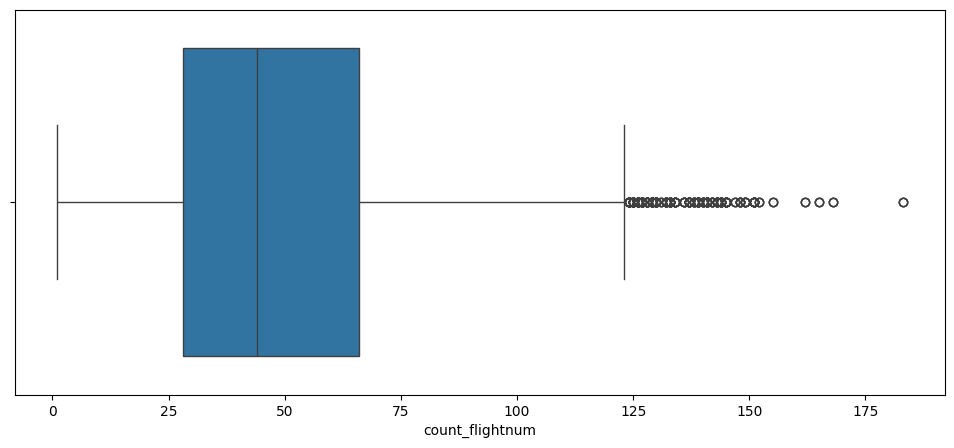

In [48]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df_merged['count_flightnum']);

G√∂zlemlenebileceƒüi √ºzere 25'den sonra bir yƒ±ƒüƒ±lma var. D√º≈ü√ºk deƒüerleri elemek istiyoruz. O halde 25'i e≈üik deƒüer olarak belirleyebiliriz.

In [49]:
df_merged[df_merged['count_flightnum'] > 25].sort_values(by='PercentageOfCounts', ascending=False).head(10)

Flight_Number_Marketing_Airline  count_flightnum DelayLabel  \
12490                             2018               31      Early   
13158                             4325               29      Early   
6813                              3121               56      Early   
13331                             2219               28    On Time   
11557                              890               33    On Time   
11545                             5905               33      Early   
13699                             3588               27      Early   
12601                             6011               30      Delay   
11171                              430               35      Delay   
7857                              2764               51      Early   

       count_flightnum_dellabel  PercentageOfCounts  
12490                        27                  87  
13158                        25                  86  
6813                         47                  83  
13331                        23                  82  
11557                        27                  81  
11545                        27                  81  
13699                        22                  81  
12601                        24                  80  
11171                        28                  80  
7857                         40                  78

Bu tablodan g√∂zlemleyebileceƒüimiz √ºzere, bazƒ± u√ßu≈ülarda **(Flight_Number_Marketing_Airline)** d√ºzenli olarak daha erken kalkƒ±≈ü s√∂z konusu iken bazƒ±larƒ±da ise daha y√ºksek oranda gecikme ya≈üanabilmektedir. Bu deƒüi≈ükenimiz de **DelayLabel** temsilcisi olarak modelin i√ßerisinde yer bulmalƒ±dƒ±r.

ƒ∞nceleyeceƒüimiz bir sonraki √∂znitelik, **TaxiOut** ve **TaxiIn** olacak.
Kalkƒ±≈ütaki ertelenmelerin tahminleneceƒüini g√∂z √∂n√ºnde bulundurduƒüumuzda burada asƒ±l incelenmesi gereken √∂znitelik **TaxiOut**'tur. TaxiIn bizim problemimiz i√ßin veri setinden √ßƒ±karƒ±labilir.

In [50]:
df.loc[:, ['TaxiOut']].describe().T

count       mean        std  min   25%   50%   75%    max
TaxiOut  291532.0  17.479896  10.272836  1.0  11.0  15.0  20.0  186.0

In [51]:
df.loc[:, ['TaxiOut']].value_counts()

TaxiOut
12.0       23816
13.0       22891
11.0       22511
14.0       21195
10.0       20218
           ...  
131.0          1
144.0          1
143.0          1
142.0          1
186.0          1
Name: count, Length: 157, dtype: int64

TaxiOut'u kategorilere ayƒ±rmaya √ßalƒ±≈üalƒ±m.

In [52]:
def func_taxiout_label(x):
    if x < 10: x = 'x<10' 
    elif x < 15: x = '10>x<15' 
    elif x < 20: x = '15>x<20' 
    else: x='x>20'
    return x


In [53]:
df['TaxiOutLabel'] = df['TaxiOut'].apply(func_taxiout_label)

In [54]:
df['TaxiOutLabel'].value_counts()

TaxiOutLabel
10>x<15    110631
x>20        77729
15>x<20     70251
x<10        32921
Name: count, dtype: int64

√ñncelikle akla gelen soru ≈üudur: 
TaxiOut s√ºresine a≈üaƒüƒ±dakilerden birisi etki ediyor olabilir mi?
- U√ßu≈üun g√ºn√ºn hangi diliminde ger√ßekle≈üiyor olduƒüu etkiliyor mu? (DepTimeBlk)
- U√ßu≈üun hangi U√ßu≈ü Numarasƒ±na sahip olduƒüu etkiliyor mu? (Flight_Number_Marketing_Airline)

In [55]:
df_taxiout_deptime_vc = df.loc[:, ['TaxiOutLabel', 'DepTimeBlk']].value_counts().to_frame().reset_index()
df_taxiout_deptime_vc

TaxiOutLabel DepTimeBlk  count
0       10>x<15  1200-1259  11463
1       10>x<15  1100-1159  11043
2       10>x<15  1300-1359  10760
3       10>x<15  1000-1059  10617
4       10>x<15  1400-1459  10394
5       10>x<15  1500-1559  10156
6          x>20  0800-0859   9943
7       10>x<15  1600-1659   8872
8       10>x<15  0800-0859   8664
9          x>20  1000-1059   8511
10         x>20  0900-0959   8280
11      10>x<15  0900-0959   7952
12      15>x<20  1000-1059   7489
13      10>x<15  0700-0759   7177
14      15>x<20  1100-1159   6934
15      10>x<15  1700-1759   6845
16         x>20  0700-0759   6659
17      15>x<20  0800-0859   6636
18      15>x<20  1200-1259   6526
19      15>x<20  1300-1359   6301
20         x>20  1100-1159   6248
21      15>x<20  1400-1459   6172
22      15>x<20  1500-1559   5882
23      15>x<20  0900-0959   5781
24         x>20  1400-1459   5657
25         x>20  1300-1359   5613
26         x>20  1500-1559   5520
27      15>x<20  1600-1659   5410
28         x>20  1200-1259   5370
29         x>20  1600-1659   5266
30         x>20  1700-1759   4794
31      15>x<20  0700-0759   4712
32      15>x<20  1700-1759   4167
33      10>x<15  0600-0659   3758
34         x<10  1200-1259   3593
35         x<10  1300-1359   3464
36         x>20  0600-0659   3313
37         x<10  1400-1459   3278
38         x<10  1000-1059   3214
39         x<10  1500-1559   3180
40         x<10  1100-1159   3110
41         x<10  1600-1659   2968
42      10>x<15  1800-1859   2930
43         x>20  1800-1859   2555
44      15>x<20  0600-0659   2369
45         x<10  1700-1759   2318
46         x<10  0800-0859   2308
47         x<10  0900-0959   2139
48      15>x<20  1800-1859   1872
49         x<10  0700-0759   1453
50         x<10  1800-1859   1166
51         x<10  0600-0659    730

Hey bir saniye! D√ºzenli olarak yaptƒ±ƒüƒ±mƒ±z ≈üu i≈üi belki de √ßok daha √∂nce fonksiyonel hale getirip zaman kazanmamƒ±z gerekirdi. Artƒ±k yapalƒ±m üòä

In [56]:
def grupla_ve_y√ºzdele(df, att1, att2, plot=None):
    df_vc = df[[att1, att2]].value_counts().to_frame().reset_index()
    df_vc2 = df[[att1, att2]].value_counts().to_frame().groupby(att2).sum().reset_index()

    df_merged = pd.merge(
        df_vc,
        df_vc2,
        on = att2, 
        suffixes=['_'+att1, '_'+att2]
    )
    df_merged['Percentage'] = (df_merged['count_'+att1] / df_merged['count_'+att2] * 100).astype(int)

    if plot == 'bar':
        plt.figure(figsize=(15,6))
        sns.barplot(data = df_merged, hue = att1, x = att2, y='Percentage')
        plt.show()

    elif plot == 'line':
        plt.figure(figsize=(15,7))
        sns.lineplot(data = df_merged, hue = att1, x = att2, y='Percentage')
        plt.show()

    return df_merged.sort_values(by='Percentage', ascending=False)

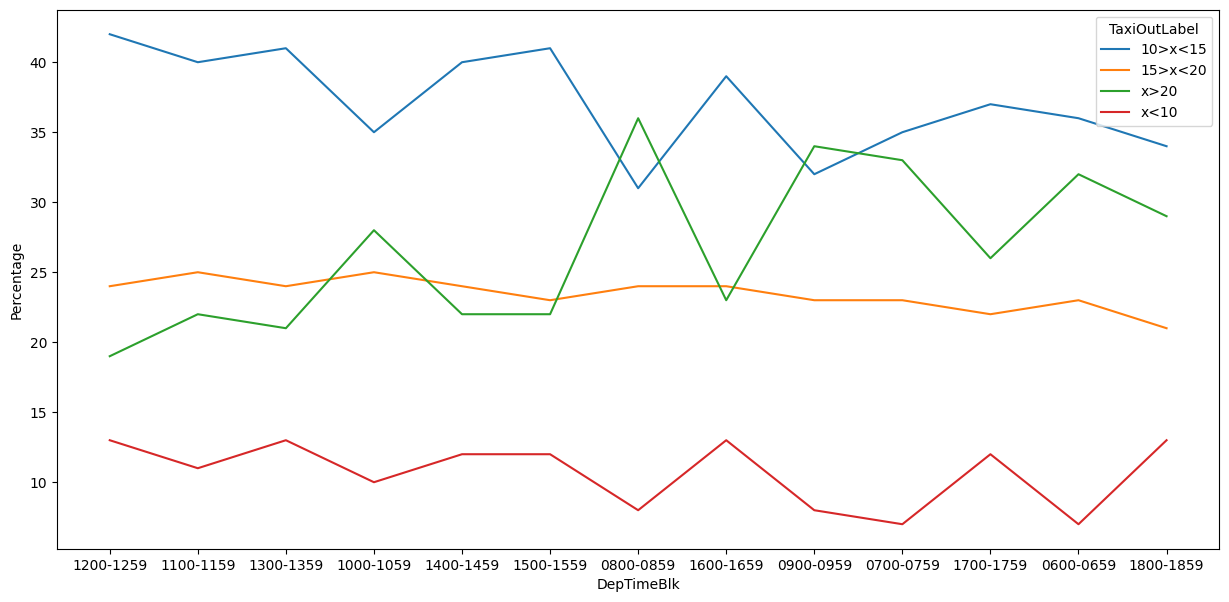

In [57]:
df_merged = grupla_ve_y√ºzdele(
    df=df, 
    att1= 'TaxiOutLabel', 
    att2='DepTimeBlk',
    plot='line'
)

Grafikten g√∂zlemleyebileceƒüimiz √ºzere, TaxiOut zamanƒ±nƒ±n, kalkƒ±≈üƒ±n g√ºn√ºn hangi diliminde ger√ßekle≈ümesi ile bir baƒülantƒ±sƒ± yoktur. Her bir taksi s√ºresi i√ßin artƒ±≈ülar ve azalƒ±≈ülar g√ºn√ºn saatlerine g√∂re olduk√ßa anlamsƒ±z seyretmektedir.

Peki ya Flight_Number_Marketing_Airline ile bir baƒülantƒ±sƒ± var mƒ±? Artƒ±k fonksiyonumuz ile hƒ±zlƒ±ca g√∂zlem yapabiliriz üòä 

Lakin Flight_Number_Marketing_Airline fazla aykƒ±rƒ± g√∂zlem i√ßerdiƒüinden dolayƒ± bazƒ± g√∂zlemleri elememiz gerek. Aksi taktirde i≈ülemimiz √ßok uzun s√ºrebilir ve grafik anlamlƒ± olmayabilir.

In [58]:
df.Flight_Number_Marketing_Airline.value_counts() #sonu√ßlar ortada...

Flight_Number_Marketing_Airline
2438    183
1537    168
493     165
464     162
2368    155
       ... 
8772      1
6161      1
3334      1
8812      1
4463      1
Name: count, Length: 6235, dtype: int64

In [59]:
df_fn_vc = df.Flight_Number_Marketing_Airline.value_counts().to_frame().reset_index()

In [60]:
df_fn_vc

Flight_Number_Marketing_Airline  count
0                                2438    183
1                                1537    168
2                                 493    165
3                                 464    162
4                                2368    155
...                               ...    ...
6230                             8772      1
6231                             6161      1
6232                             3334      1
6233                             8812      1
6234                             4463      1

[6235 rows x 2 columns]

In [61]:
fn_list_array = df_fn_vc[df_fn_vc['count']>145]['Flight_Number_Marketing_Airline'].values

In [62]:
df_taxiout_flightnum = df[['TaxiOutLabel', 'Flight_Number_Marketing_Airline']][df['Flight_Number_Marketing_Airline'].isin(fn_list_array)].reset_index(drop=True)
df_taxiout_flightnum

TaxiOutLabel  Flight_Number_Marketing_Airline
0         10>x<15                             1623
1            x<10                             1710
2            x<10                             1710
3         10>x<15                             2301
4         15>x<20                             2301
...           ...                              ...
2325      10>x<15                             4232
2326      10>x<15                             4232
2327      10>x<15                             4232
2328      15>x<20                             4232
2329      15>x<20                             4232

[2330 rows x 2 columns]

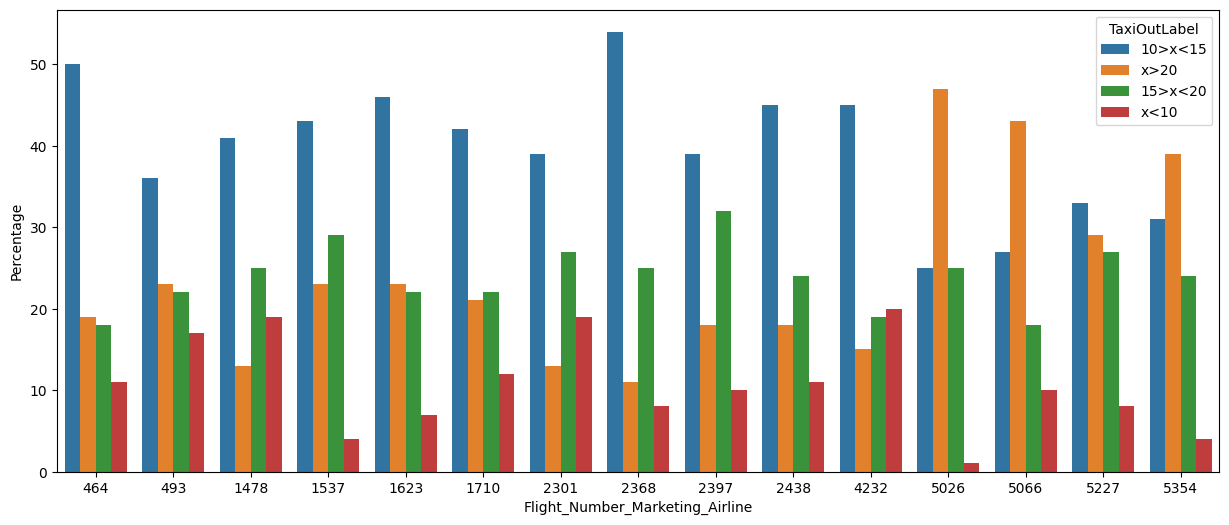

In [63]:
df_merged = grupla_ve_y√ºzdele(
    df=df_taxiout_flightnum, 
    att1= 'TaxiOutLabel', 
    att2='Flight_Number_Marketing_Airline',
    plot='bar'
)

√ñyle g√∂r√ºnmektedir ki bazƒ± u√ßu≈ü numaralƒ± u√ßu≈ülarda u√ßaƒüƒ±n taksi s√ºrekli ger√ßekten de diƒüerlerine g√∂re daha fazla seyretmektedir. Bazƒ± u√ßu≈ü numaralƒ± u√ßaklarƒ±n, hava trafiƒüi noktasƒ±nda √∂nceliklendirilmesi s√∂z konusu olabilir.

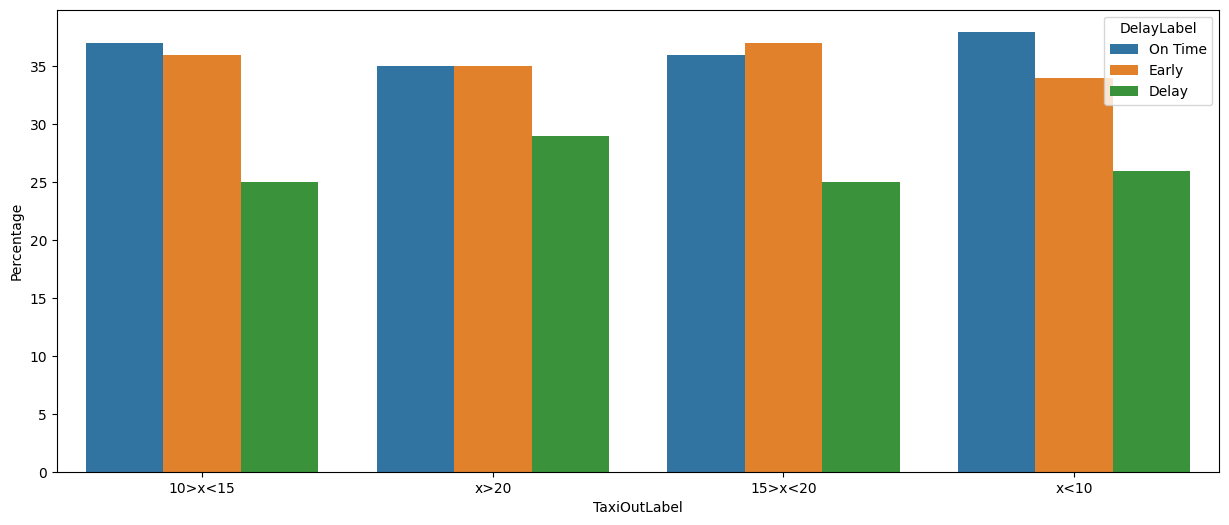

In [64]:
df_merged = grupla_ve_y√ºzdele(
    df=df, 
    att1= 'DelayLabel', 
    att2='TaxiOutLabel',
    plot='bar'
)

Oysa taksi s√ºresinin planlanan kalkƒ±≈ü s√ºresi ile d√º≈ü√ºn√ºlenin aksine doƒürudan bir ili≈ükisi bulunmamaktadƒ±r. Taksi s√ºresi muhtemelen √∂nceden tahmin edilip, u√ßaƒüƒ±n pissten ayrƒ±lƒ±≈ü s√ºresi ona g√∂re planlanmaktadƒ±r. Aksi halde, 20 dakikanƒ±n √ºzerinde taksi s√ºresi olan u√ßaklar "DelayLabel" anlamƒ±nda "On Time" sƒ±nƒ±fƒ±na girememeleri gerekirdi.

Sonu√ß olarak, **TaxiOut** bizim problemimiz i√ßin modelleme safhasƒ±nda **kullanƒ±lmamalƒ±dƒ±r!**

**ArrTime** 'ƒ±n ayrƒ±ca deƒüerlendirilmesine gerek olmadƒ±ƒüƒ± √ßok a√ßƒ±ktƒ±r.

**Cancalled** durumlarƒ±nƒ±n daƒüƒ±lƒ±mƒ±na g√∂z atalƒ±m.

In [65]:
df.Cancelled.value_counts()
# Veri seti i√ßin herhangi bir u√ßu≈ü iptal durumu s√∂z konusu deƒüildir

Cancelled
0.0    291532
Name: count, dtype: int64

**Diverted** durumlarƒ±nƒ±n daƒüƒ±lƒ±mƒ±na g√∂z atalƒ±m.

In [66]:
df.Diverted.value_counts()
# Veri seti i√ßin herhangi bir varƒ±≈ü noktasƒ± deƒüikliƒüi durumu s√∂z konusu deƒüildir

Diverted
0.0    291532
Name: count, dtype: int64

Elapsed Time i√ßin iki farklƒ± attribute mevcuttur: **CRSElapsedTime** ve **ActualElapsedTime**

**ElapsedError** = CRSElapsedTime - ActualElapsedTime

≈üeklinde yeni bir deƒüi≈üken t√ºretebiliriz. 

Ardƒ±ndan bu deƒüi≈ükenin hedef deƒüi≈üken ile ile birliktelik analizini ger√ßekle≈ütirilecektir.


In [67]:
df['ElapsedError'] = df['CRSElapsedTime'] - df['ActualElapsedTime']

In [68]:
df.ElapsedError.describe()

count    291532.000000
mean          7.575995
std          14.240126
min        -220.000000
25%           1.000000
50%           9.000000
75%          16.000000
max         173.000000
Name: ElapsedError, dtype: float64

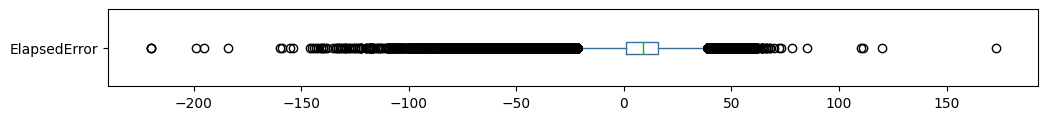

In [69]:
plt.figure(figsize=(12,1))
df.ElapsedError.plot.box(vert=False);

In [70]:
def func_elapsed_error_label(x):
    if x < 0: x = 'Took Shorter than Planned'
    elif x < 10: x = 'Hitch (<10 min)'
    elif x < 20: x = 'Hitch (<20 min)'
    else: x = 'Bad Timing (>20 min)'
    return x

In [71]:
df['ElapsedErrorLabel'] = df['ElapsedError'].apply(func_elapsed_error_label)

In [72]:
df['ElapsedErrorLabel'].value_counts()

ElapsedErrorLabel
Hitch (<20 min)              97043
Hitch (<10 min)              90708
Took Shorter than Planned    60047
Bad Timing (>20 min)         43734
Name: count, dtype: int64

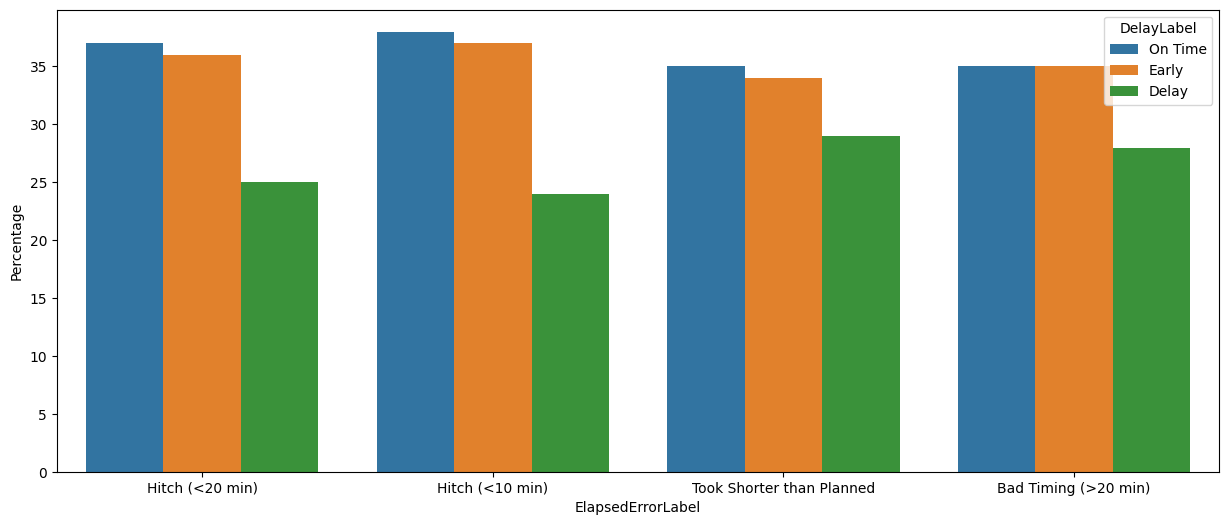

In [73]:
df_merged = grupla_ve_y√ºzdele(
    df=df,
    att1='DelayLabel',
    att2='ElapsedErrorLabel',
    plot='bar'
)

G√∂r√ºleceƒüi √ºzere Elapsed s√ºrede meydana gelen aksaklƒ±ƒüƒ±n DelayLabel √ºzerinde etkisi olduk√ßa d√º≈ü√ºkt√ºr.

ƒ∞nceleyeceƒüimiz bir sonraki deƒüi≈üken **AirTime** olacak. 

In [74]:
df.AirTime.describe().to_frame().T

count        mean        std   min   25%   50%    75%    max
AirTime  291532.0  103.142811  60.510583  13.0  58.0  89.0  132.0  522.0

In [75]:
def func_air_time_label(x):
    if x < 60: x= 'Short Flight'
    elif x < 120: x='Medium Flight'
    else: x = 'Long Flight'
    return x

In [76]:
df['AirTimeLabel'] = df['AirTime'].apply(func_air_time_label)

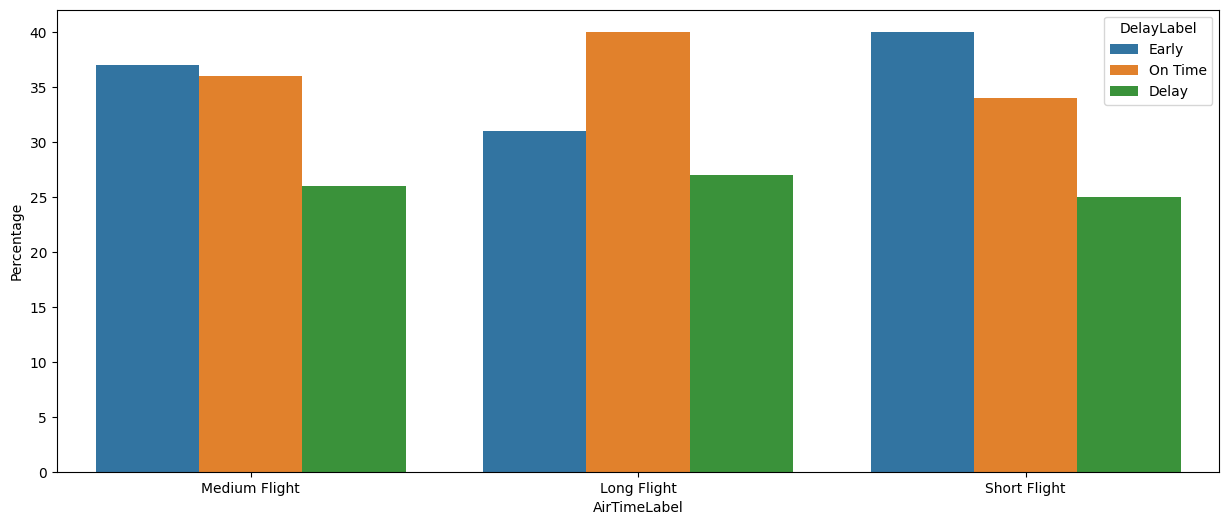

In [77]:
df_merged = grupla_ve_y√ºzdele(
    df=df,
    att1='DelayLabel', 
    att2='AirTimeLabel',
    plot='bar'
)

G√∂zlemlenmektedir ki, u√ßu≈ülarƒ±n ertelenmesi ile u√ßu≈üun ne kadar uzak mesafeye yapƒ±ldƒ±ƒüoƒ± (Airtime) arasƒ±nda bir baƒüƒ±ntƒ± olmasa da, kƒ±sa u√ßu≈ü s√ºrelerinde zamanƒ±ndan √∂nce kalkƒ±≈ülar daha olasƒ±dƒ±r. U√ßu≈ü s√ºresi uzadƒ±k√ßa u√ßu≈ülar doƒüru zamanda (On Time) kalkmaya meyletmektedir.

Dolayƒ±sƒ±yla **AirTime** √∂zniteliƒüi modellemede kullanƒ±labilir.

Kalkƒ±≈üƒ±n yapƒ±ldƒ±ƒüƒ± havalimanƒ± ile planlanan kalkƒ±≈ütaki farklƒ±lƒ±klar baƒülantƒ±lƒ± olmalƒ±. Bunu g√∂zlemleyebilmek adƒ±na **Merged by OriginAirportID** kolonunu g√∂zlemleyelim.

In [78]:
df['Merged by OriginAirportID']

0         10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...
1         11697 / 1169706 / 32467 / FLL / Fort Lauderdal...
2         10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...
3         12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...
4         14524 / 1452401 / 34524 / RIC / Richmond, VA /...
                                ...                        
291527    11003 / 1100303 / 31003 / CID / Cedar Rapids/I...
291528    11003 / 1100303 / 31003 / CID / Cedar Rapids/I...
291529    11003 / 1100303 / 31003 / CID / Cedar Rapids/I...
291530    11298 / 1129806 / 30194 / DFW / Dallas/Fort Wo...
291531    11298 / 1129806 / 30194 / DFW / Dallas/Fort Wo...
Name: Merged by OriginAirportID, Length: 291532, dtype: object

In [79]:
new_columns = df['Merged by OriginAirportID'].str.split(' / ', expand=True)
new_columns

0        1      2    3                           4   5   6  \
0       10397  1039707  30397  ATL                 Atlanta, GA  GA  13   
1       11697  1169706  32467  FLL         Fort Lauderdale, FL  FL  12   
2       10397  1039707  30397  ATL                 Atlanta, GA  GA  13   
3       12448  1244807  32448  JAN       Jackson/Vicksburg, MS  MS  28   
4       14524  1452401  34524  RIC                Richmond, VA  VA  51   
...       ...      ...    ...  ...                         ...  ..  ..   
291527  11003  1100303  31003  CID  Cedar Rapids/Iowa City, IA  IA  19   
291528  11003  1100303  31003  CID  Cedar Rapids/Iowa City, IA  IA  19   
291529  11003  1100303  31003  CID  Cedar Rapids/Iowa City, IA  IA  19   
291530  11298  1129806  30194  DFW       Dallas/Fort Worth, TX  TX  48   
291531  11298  1129806  30194  DFW       Dallas/Fort Worth, TX  TX  48   

                  7   8  
0           Georgia  34  
1           Florida  33  
2           Georgia  34  
3       Mississippi  53  
4          Virginia  38  
...             ...  ..  
291527         Iowa  61  
291528         Iowa  61  
291529         Iowa  61  
291530        Texas  74  
291531        Texas  74  

[291532 rows x 9 columns]

In [80]:
df_originAirport = new_columns.iloc[:,3].to_frame().rename(columns={3: 'OriginAirport'})
df_originAirport

OriginAirport
0                ATL
1                FLL
2                ATL
3                JAN
4                RIC
...              ...
291527           CID
291528           CID
291529           CID
291530           DFW
291531           DFW

[291532 rows x 1 columns]

In [81]:
df = pd.concat(
    [df, df_originAirport], axis=1
)

In [82]:
df.drop('Merged by OriginAirportID', axis=1, inplace=True)

In [83]:
df_airport_vc = df['OriginAirport'].value_counts().to_frame().reset_index()
df_airport_vc

OriginAirport  count
0             ATL  14881
1             ORD  14509
2             DFW  13712
3             CLT  11476
4             DEN  11294
..            ...    ...
313           ART     13
314           CGI     10
315           CYS      3
316           ATY      2
317           PIR      2

[318 rows x 2 columns]

In [84]:
airport_selected_counts_list = df_airport_vc[df_airport_vc['count'] > 10000]['OriginAirport'].values.tolist()
airport_selected_counts_list

['ATL', 'ORD', 'DFW', 'CLT', 'DEN']

In [85]:
df2 = df[df['OriginAirport'].isin(airport_selected_counts_list)].reset_index(drop=True)

In [86]:
df2.shape

(65872, 33)

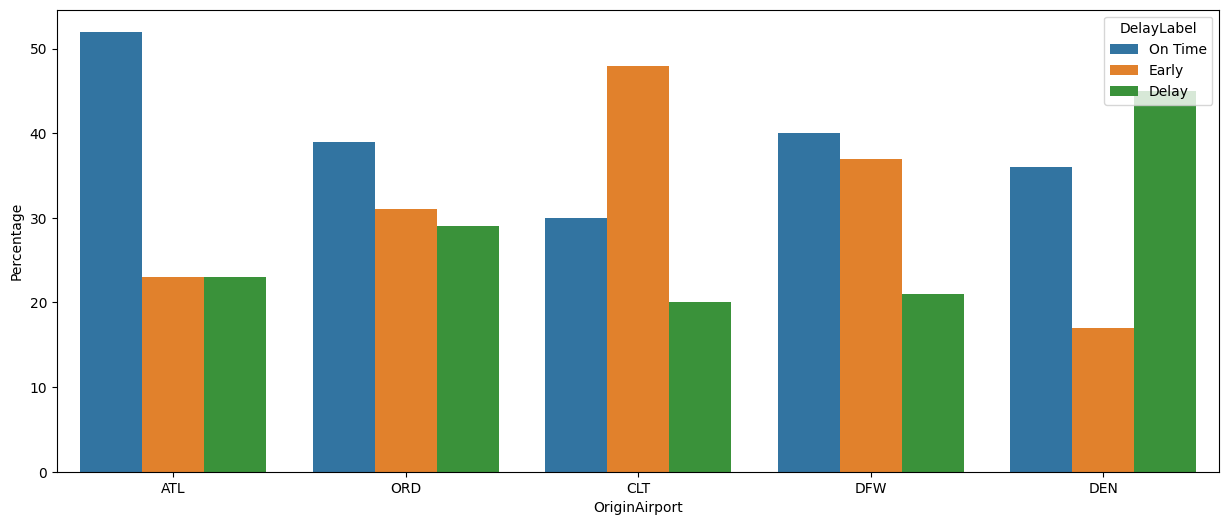

In [87]:
df_merged = grupla_ve_y√ºzdele(
    df2,
    'DelayLabel', 'OriginAirport',
    'bar'
)

Bu grafik, veri setinde en √ßok u√ßu≈ü kalkƒ±≈üƒ± ger√ßekle≈ütiren 5 b√ºy√ºk havalimanƒ± √ºzerinden √ßizdirilmi≈ütir. Rahatlƒ±kla g√∂zlemlenmektedir ki, DelayLabel kolonu, kalkƒ±≈üƒ±n ger√ßekle≈ütiƒüi havalimanƒ±na g√∂re deƒüi≈üiklik g√∂stermektedir. Dolasƒ±yƒ±la, modelleme safhasƒ±nda yeterince kalkƒ±≈üƒ±n ger√ßekle≈ümediƒüi havalimanlarƒ± verisetinden √ßƒ±kartƒ±larak, bir √∂nceki a≈üamada merge edilen **Merged by OriginAirportID** isimli kolonun sadece havalimanƒ± ≈üehir isimlerinin kƒ±saltmalarƒ±nƒ± tutacak ≈üekilde revize edilmesi ile olu≈üturulan **OriginAirport** isimli kolondan faydalanƒ±lacaktƒ±r.

Peki aynƒ± durum ini≈üin yapƒ±lacaƒüƒ± havalimanƒ± i√ßin de ge√ßerli mi? **Merged by DestAirportSeqID:** incelensin! ‚ú®

In [88]:
df['Merged by DestAirportSeqID']

0         1169706 / 11697 / 32467 / FLL / Fort Lauderdal...
1         1449202 / 14492 / 34492 / RDU / Raleigh/Durham...
2         1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...
3         1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...
4         1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...
                                ...                        
291527    1129806 / 11298 / 30194 / DFW / Dallas/Fort Wo...
291528    1129806 / 11298 / 30194 / DFW / Dallas/Fort Wo...
291529    1129806 / 11298 / 30194 / DFW / Dallas/Fort Wo...
291530    1342202 / 13422 / 30562 / MOB / Mobile, AL / A...
291531    1342202 / 13422 / 30562 / MOB / Mobile, AL / A...
Name: Merged by DestAirportSeqID, Length: 291532, dtype: object

In [89]:
new_columns = df['Merged by DestAirportSeqID'].str.split(' / ', expand=True)

df_originAirport = new_columns.iloc[:,3].to_frame().rename(columns={3: 'DestAirport'})

df = pd.concat(
    [df, df_originAirport], axis=1
)

df.drop('Merged by DestAirportSeqID', axis=1, inplace=True)

df_airport_vc = df['DestAirport'].value_counts().to_frame().reset_index()

airport_selected_counts_list = df_airport_vc[df_airport_vc['count'] > 10000]['DestAirport'].values.tolist()
airport_selected_counts_list

['DFW', 'ORD', 'ATL', 'DEN', 'CLT']

In [90]:
df2 = df[df['DestAirport'].isin(airport_selected_counts_list)].reset_index(drop=True)

df2.shape

(70343, 33)

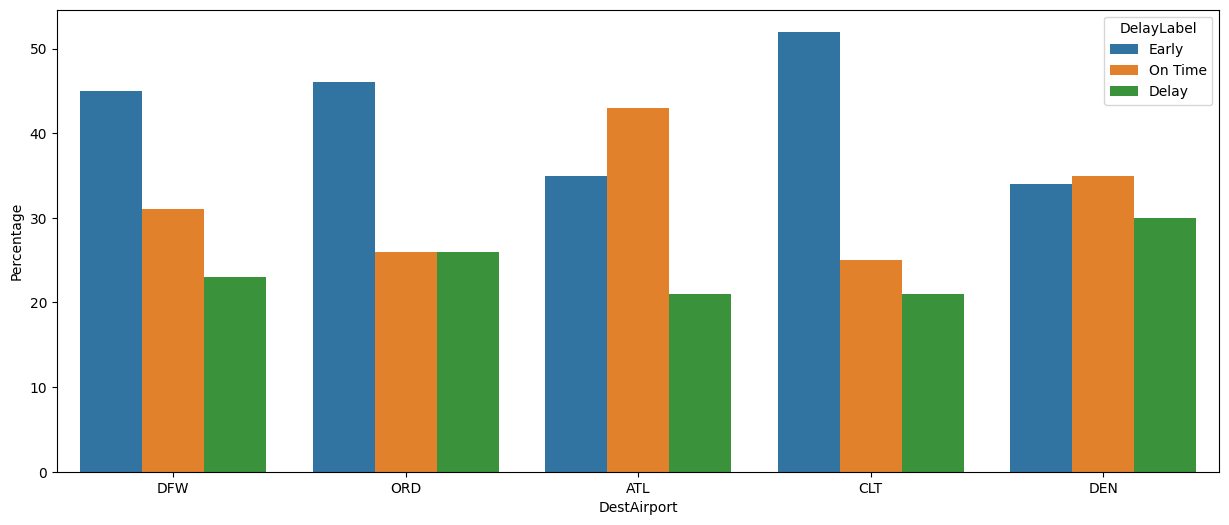

In [91]:
df_merged = grupla_ve_y√ºzdele(
    df2,
    'DelayLabel', 'DestAirport',
    'bar'
)

G√∂zlemlenebileceƒüi √ºzere varƒ±≈ü havalimanƒ± da, planlanan kalkƒ±≈ü zamanƒ±nda deƒüi≈üikliklere sebep olmaktadƒ±r. Fakat sezgisel olarak yakla≈üƒ±ldƒ±ƒüƒ±nda DelayLabel-DestAirport ili≈ükisinin daha tesad√ºfi bir daƒüƒ±lƒ±m sergilediƒüi sonucuna varƒ±labilir. Kalkƒ±≈üta ya≈üanacak bir gecikme, kalkƒ±≈üƒ±n yapƒ±ldƒ±ƒüƒ± havalimanƒ±ndaki pek √ßok etmene baƒülƒ± olabilme potansiyeli ta≈üƒ±rken, ini≈üin ger√ßekle≈üeceƒüi havalimanƒ± ile baƒülantƒ±lƒ± olma ihtimali √ßok daha d√º≈ü√ºkt√ºr. Dolayƒ±sƒ±yla **Merged by DestAirportSeqID**, ya da seyreltilmi≈ü olarak olu≈üturulan yeni √∂znitelik adƒ±yla **DestAirport** modelleme safhasƒ±nda kullanƒ±lmayacaktƒ±r.

Son olarak **Merged by Distance** √∂zniteliƒüi kalmƒ±≈ütƒ±r. Havada ge√ßirilen zaman halihazƒ±rda modelleme safhasƒ±na dahil edilecektir. Bahsi ge√ßen Merged by Distance √∂zniteliƒüi ile Havada ge√ßen zaman (AirTime) y√ºksek bir korelasyon halindedir. Ayrƒ±ca bu √∂zniteliƒüin modelleme safhasƒ±nda **yer almasƒ±na gerek yoktur**.

----

**Sƒ±nƒ±flandƒ±rma** i√ßin hedef deƒüi≈üken se√ßimini yapabilmek adƒ±na veriden hazƒ±r √∂zniteliklerden (DepDel15 ya da DepatureDelayGroups) yararlanƒ±lmalƒ± mƒ±, yoksa yeni bir sƒ±nƒ±flandƒ±rma √∂zniteliƒüi olu≈üturulmalƒ± mƒ±? Bu incelenecektir.

In [92]:
for i in df.iloc[:, -2:].columns:
    print(df.loc[:, i].value_counts(), '\n', '-'*40)

OriginAirport
ATL    14881
ORD    14509
DFW    13712
CLT    11476
DEN    11294
       ...  
ART       13
CGI       10
CYS        3
ATY        2
PIR        2
Name: count, Length: 318, dtype: int64 
 ----------------------------------------
DestAirport
DFW    15748
ORD    15497
ATL    14336
DEN    13237
CLT    11525
       ...  
ALS       13
CGI        8
PIR        2
ATY        2
CYS        1
Name: count, Length: 317, dtype: int64 
 ----------------------------------------


In [93]:
target = df['DepDelay']

In [94]:
target.describe()

count    291532.000000
mean          9.647226
std          46.828830
min         -49.000000
25%          -6.000000
50%          -3.000000
75%           6.000000
max        2501.000000
Name: DepDelay, dtype: float64

### 1. Aykƒ±rƒ± Deƒüer Analiz


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

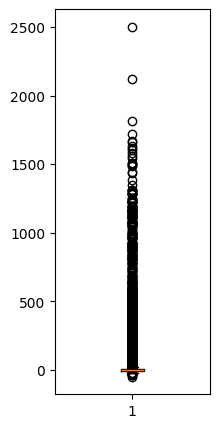

In [96]:
plt.figure(figsize=(2,5))
plt.boxplot(target);

# ƒ∞ncelenebileceƒüi √ºzere aykƒ±rƒ± deƒüerler veri √ºzerinde g√ºr√ºlt√º olu≈üturmaktadƒ±r.

Aykƒ±rƒ± deƒüerleri ayƒ±klamadan √∂nce veri boyutu: 291532
Aykƒ±rƒ± deƒüerleri ayƒ±kladƒ±ktan sonra veri boyutu: 284742
Veri kaybƒ±: 6790


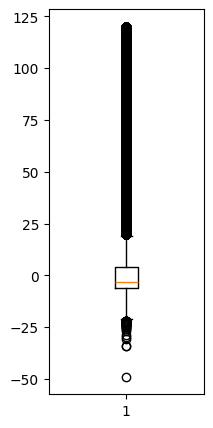

In [97]:
# ƒ∞statistiksel bir methodoloji izlemeden √∂nce, kenidimiz bir e≈üik deƒüer belirleyelim ve aykƒ±rƒ± deƒüerlerden b√∂ylece kurtulmaya √ßalƒ±≈üalƒ±m.

threshold: 120 # 2 saat
target2 = target[target <= 120]

plt.figure(figsize=(2,5))
plt.boxplot(target2);

print('Aykƒ±rƒ± deƒüerleri ayƒ±klamadan √∂nce veri boyutu:', target.size)
print('Aykƒ±rƒ± deƒüerleri ayƒ±kladƒ±ktan sonra veri boyutu:', target2.size)
print('Veri kaybƒ±:', target.size-target2.size)


U√ß deƒüerleri manuel olarak temizledik ve olu≈üan veri kaybƒ±nƒ± g√∂zlemledik. Tahmin problemi i√ßin istatistiksel bir methodoloji ile (√∂rneƒüin IQR, e≈üik deƒüer 1.5 olarak ayarlanabilir) ilerleyebileceƒüimiz g√∂r√ºlmektedir. Fakat sƒ±nƒ±flandƒ±rma i√ßin, veri setini eksiltmek zorunda kalmayacaƒüƒ±mƒ±z farklƒ± bir yakla≈üƒ±m benimsenebilir. Kodun devamƒ±nda bu durum a√ßƒ±klanmaya √ßalƒ±≈üƒ±lacaktƒ±r.

DelayLabel
Almost on time    136600
Early              80736
Delay              67406
Name: count, dtype: int64


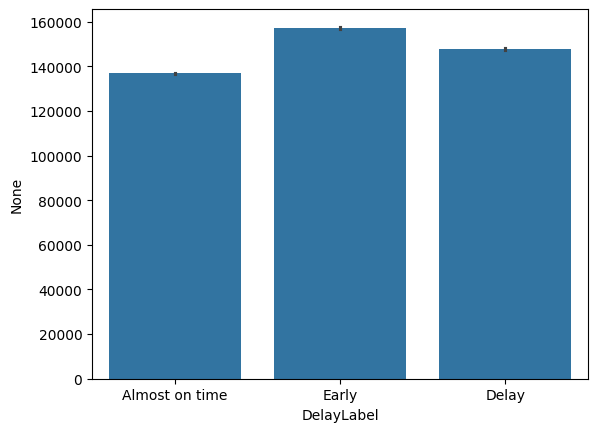

In [98]:

target2_df = target2.to_frame()
target2_df['DelayLabel'] = None

# epoch = 0
for i in range(target2_df.shape[0]):

    value = target2_df.iloc[i, 0]

    if (value < -5): 
        target2_df.iloc[i, 1] = 'Early'

    elif (value > 5):
        target2_df.iloc[i, 1] = 'Delay'

    else:
        target2_df.iloc[i, 1] = 'Almost on time'

print(target2_df.DelayLabel.value_counts(dropna=False))

sns.barplot(x = 'DelayLabel', y = target2_df.DelayLabel.index, data = target2_df);

Peki ya aykƒ±rƒ± deƒüerleri temizlemezsek?

DelayLabel
Almost on time    136600
Early              80736
Delay              74196
Name: count, dtype: int64


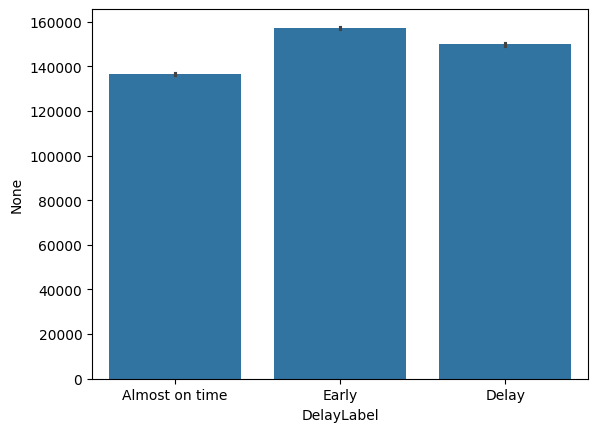

In [99]:
target_df = target.to_frame()
target_df['DelayLabel'] = None

# epoch = 0
for i in range(target_df.shape[0]):

    value = target_df.iloc[i, 0]

    if (value < -5): 
        target_df.iloc[i, 1] = 'Early'

    elif (value > 5):
        target_df.iloc[i, 1] = 'Delay'

    else:
        target_df.iloc[i, 1] = 'Almost on time'

print(target_df.DelayLabel.value_counts(dropna=False))

sns.barplot(x = 'DelayLabel', y = target_df.DelayLabel.index, data = target_df);

Aykƒ±rƒ± deƒüerler bu problem i√ßin bir sorun te≈ükil etmeyebilir.

Bir ka√ß farklƒ± denemeden sonra sƒ±nƒ±f daƒüƒ±lƒ±mlarƒ±nƒ±n d√ºzensiz olmadƒ±ƒüƒ± anlamlƒ± bir etiketleme ile bir sƒ±nƒ±flandƒ±rma √∂zniteliƒüi √ºretilmi≈ütir. √ú√ß farklƒ± etiket i√ßerdiƒüinden √ßoklu sƒ±nƒ±flandƒ±rma (multi classification) olarak nitelendirilebilir.

In [100]:
df

Flight_Number_Marketing_Airline  CRSDepTime  DepTime DepTimeBlk  \
0                                  1582        1631   1627.0  1600-1659   
1                                  1583        1024   1019.0  1000-1059   
2                                  1584        1117   1113.0  1100-1159   
3                                  1584        1237   1230.0  1200-1259   
4                                  1585         900    857.0  0900-0959   
...                                 ...         ...      ...        ...   
291527                             5997        1621   1212.0  1600-1659   
291528                             5997        1621   1625.0  1600-1659   
291529                             5997        1621   1742.0  1600-1659   
291530                             5998        1740   1738.0  1700-1759   
291531                             5998        1740   1845.0  1700-1759   

        TaxiOut  TaxiIn  ArrTime  Cancelled  Diverted  CRSElapsedTime  \
0          15.0     5.0   1820.0        0.0       0.0           110.0   
1          17.0     3.0   1212.0        0.0       0.0           123.0   
2          14.0     4.0   1131.0        0.0       0.0            85.0   
3          11.0     5.0   1435.0        0.0       0.0            81.0   
4          13.0     8.0   1038.0        0.0       0.0           110.0   
...         ...     ...      ...        ...       ...             ...   
291527     32.0    44.0   1503.0        0.0       0.0           151.0   
291528     10.0    16.0   1829.0        0.0       0.0           151.0   
291529     13.0    31.0   2004.0        0.0       0.0           151.0   
291530     24.0     3.0   1912.0        0.0       0.0            95.0   
291531     18.0     6.0   2020.0        0.0       0.0            95.0   

        ActualElapsedTime  AirTime  Flights  DivAirportLandings  \
0                   113.0     93.0      1.0                   0   
1                   113.0     93.0      1.0                   0   
2                    78.0     60.0      1.0                   0   
3                    65.0     49.0      1.0                   0   
4                   101.0     80.0      1.0                   0   
...                   ...      ...      ...                 ...   
291527              171.0     95.0      1.0                   0   
291528              124.0     98.0      1.0                   0   
291529              142.0     98.0      1.0                   0   
291530               94.0     67.0      1.0                   0   
291531               95.0     71.0      1.0                   0   

            Merged by Marketing_Airline_Network Merged by Operating_Airline  \
0                 DL / DL / 19790 / DL / N545US             DL / 19790 / DL   
1                 DL / DL / 19790 / DL / N345NB             DL / 19790 / DL   
2                 DL / DL / 19790 / DL / N978AT             DL / 19790 / DL   
3                 DL / DL / 19790 / DL / N978AT             DL / 19790 / DL   
4                 DL / DL / 19790 / DL / N878DN             DL / 19790 / DL   
...                                         ...                         ...   
291527  AA / AA_CODESHARE / 19805 / AA / N948LR             YV / 20378 / YV   
291528  AA / AA_CODESHARE / 19805 / AA / N955LR             YV / 20378 / YV   
291529  AA / AA_CODESHARE / 19805 / AA / N957LR             YV / 20378 / YV   
291530  AA / AA_CODESHARE / 19805 / AA / N958LR             YV / 20378 / YV   
291531  AA / AA_CODESHARE / 19805 / AA / N919FJ             YV / 20378 / YV   

       Merged by CRSArrTime Merged by Distance  DepDelay  DepDelayMinutes  \
0          1821 / 1800-1859          581.0 / 3      -4.0              0.0   
1          1227 / 1200-1259          680.0 / 3      -5.0              0.0   
2          1142 / 1100-1159          341.0 / 2      -4.0              0.0   
3          1458 / 1400-1459          341.0 / 2      -7.0              0.0   
4          1050 / 1000-1059          481.0 / 2      -3.0              0.0   
...           

In [101]:
df.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_manipulated2.csv', index=False)